In [204]:
### import necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.integrate import odeint
from scipy.integrate import simps
from scipy import integrate
import seaborn as sns
sns.set()
sns.despine()

<Figure size 640x480 with 0 Axes>

In [205]:
### read temperature and moisture data
p_temp_data = pd.read_csv('./3fungi_data/fungi_p.sang.s_temp.csv')
t_temp_data = pd.read_csv('./3fungi_data/fungi_t.chion.n_temp.csv')
x_temp_data = pd.read_csv('./3fungi_data/fungi_x.sub.s_temp.csv')
### read moisture data
p_moist_data = pd.read_csv('./3fungi_data/fungi_p.sang.s_moist.csv')
t_moist_data = pd.read_csv('./3fungi_data/fungi_t.chion.n_moist.csv')
x_moist_data = pd.read_csv('./3fungi_data/fungi_x.sub.s_moist.csv')

In [206]:
### start of part A
print("--------------------------------------------")
print("--------------------------------------------")
print("The part below is the part A")
print("--------------------------------------------")
print("--------------------------------------------")

--------------------------------------------
--------------------------------------------
The part below is the part A
--------------------------------------------
--------------------------------------------


In [231]:
### compitition model
def diff_three_species(w, time,r_p, r_t, r_x, n_p, n_t, n_x, init_p, init_t, init_x,  s_pt, s_px, s_tp, s_tx, s_xp, s_xt):
        p, t, x = w
        return np.array([r_p * p * (1 - p / n_p - s_pt * t / n_t - s_px * x / n_x), r_t * t * (1 - t / n_t - s_tp * p / n_p - s_tx * x / n_x), r_x * x * (1 - x / n_x - s_xp * p / n_p - s_xt * t / n_t)])

def cal_integral(x,y):
    integrals = []
    for i in range(len(y)):
        integrals.append(integrate.trapz(y[:i + 1], x[:i + 1]))
    return integrals

def calculate_wooden_fiber_loss(time, decomposition_speed):
    loss = np.array(cal_integral(time, decomposition_speed))
    for id in range(len(loss)):
        if loss[id] > 1:
            loss[id] = 1
    return loss

def competition_model_three_species(r_p, r_t, r_x, p_Decomposition_rate, t_Decomposition_rate, x_Decomposition_rate , n_p, n_t, n_x, init_p, init_t, init_x, time):
    
    ### conditions: 1. 22C
    s_pt = t_Decomposition_rate/p_Decomposition_rate
    s_px = x_Decomposition_rate/p_Decomposition_rate
    s_tp = p_Decomposition_rate/t_Decomposition_rate
    s_tx = x_Decomposition_rate/t_Decomposition_rate
    s_xp = p_Decomposition_rate/x_Decomposition_rate
    s_xt = t_Decomposition_rate/x_Decomposition_rate
    ### capability of the decomposition rate of unit density of fungi
    p_capability=p_Decomposition_rate/init_p
    t_capability=t_Decomposition_rate/init_t
    x_capability=x_Decomposition_rate/init_x
    solution = odeint(diff_three_species, [init_p, init_t, init_x], time, args=(r_p, r_t, r_x, n_p, n_t, n_x, init_p, init_t, init_x, s_pt, s_px, s_tp, s_tx, s_xp, s_xt))
    plt.title('Competition Model for 3 Fungi density', font={'family':'Times New Roman', 'size':15})
    plt.xlabel('Time', font={'family':'Times New Roman', 'size':12}, loc='right')
    plt.ylabel('Fungi Density', font={'family':'Times New Roman', 'size':12}, loc='top')
    plt.plot(time, solution[:, 0], label='p.sang.s')
    plt.plot(time, solution[:, 1], label='t.chion.n')
    plt.plot(time, solution[:, 2], label='x.sub.s')
    plt.legend()
    plt.show()

    ### The decomposition speed of the three fungi is measured by the decomposition rate of the unit density times the density of the three fungi
    p_Decomposition_speed=p_capability*solution[:,0]
    t_Decomposition_speed=t_capability*solution[:,1]
    x_Decomposition_speed=x_capability*solution[:,2]
    plt.title('Decomposition Speed of 3 Fungi', font={'family':'Times New Roman', 'size':15})
    plt.ylabel("Decomposition Speed", font={'family': 'Times New Roman', 'size': 12}, loc='top')
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12}, loc='right')
    plt.plot(time, p_Decomposition_speed, label='p.sang.s')
    plt.plot(time, t_Decomposition_speed, label='t.chion.n')
    plt.plot(time, x_Decomposition_speed, label='x.sub.s')
    plt.legend()
    plt.show()

    plt.title('Wooden Fiber Remain', font={'family': 'Times New Roman', 'size': 15})
    plt.ylabel("Wooden Fiber", font={'family': 'Times New Roman', 'size': 12}, loc='top')
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12}, loc='right')
    p_loss = calculate_wooden_fiber_loss(time, p_Decomposition_speed)
    plt.plot(time, 1-p_loss, label='p.sang.s')
    t_loss = calculate_wooden_fiber_loss(time, t_Decomposition_speed)
    plt.plot(time, 1-t_loss, label='t.chion.n')
    x_loss = calculate_wooden_fiber_loss(time, x_Decomposition_speed)
    plt.plot(time[0:len(x_loss)], 1-x_loss, label='x.sub.s')
    loss = p_loss+t_loss+x_loss
    for id in range(len(loss)):
        if loss[id] > 1:
            loss[id] = 1
    plt.plot(time, 1-loss, label='all fungi')
    plt.legend()
    plt.show()
    return loss


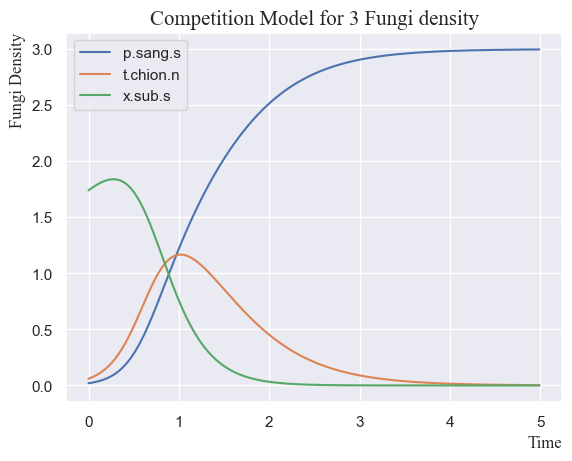

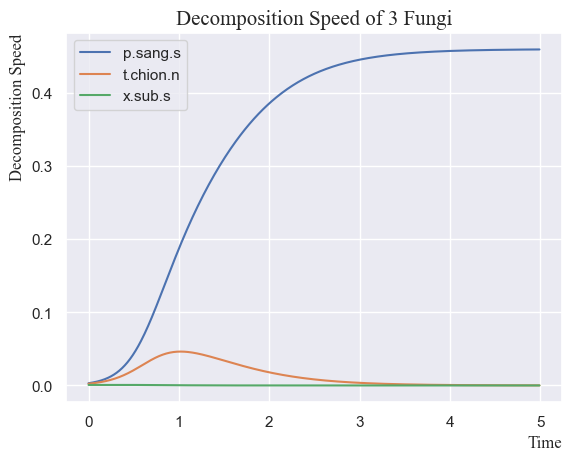

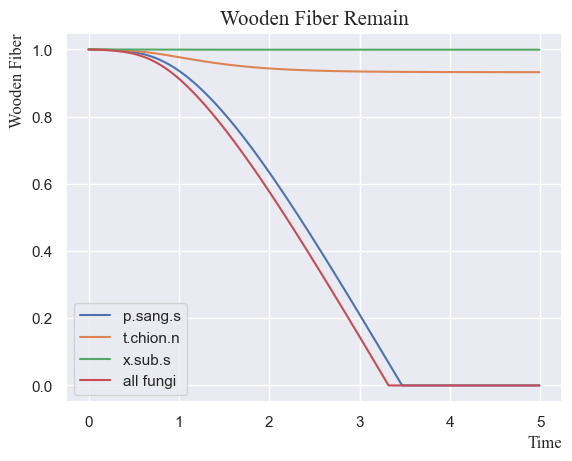

In [232]:
### implement the competition model for 3 fungi
### data from temperature
r_p = p_temp_data[p_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
r_t = t_temp_data[t_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
r_x = x_temp_data[x_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
# print(r_p, r_t, r_x)
p_Decomposition_rate = 0.3743/122
t_Decomposition_rate = 0.2906/122
x_Decomposition_rate = 0.0855/122
n_p, n_t, n_x = 3, 3, 3
### unit of density: s micrograms dry mass per cubic centimer at 1 cm to g/m3
init_p, init_t, init_x = 0.02, 0.06, 1.74
time = np.arange(0, 5, 0.01)
loss_3_species = competition_model_three_species(r_p, r_t, r_x, p_Decomposition_rate, t_Decomposition_rate, x_Decomposition_rate , n_p, n_t, n_x, init_p, init_t, init_x, time)

In [209]:
### start of part B
print("--------------------------------------------")
print("--------------------------------------------")
print("The part below is the part B")
print("--------------------------------------------")
print("--------------------------------------------")

--------------------------------------------
--------------------------------------------
The part below is the part B
--------------------------------------------
--------------------------------------------


In [210]:
### read temperature data and moisture data for 5 species
### read temperature data
a1_temp_data = pd.read_csv('./3fungi_data/fungi_a.gal1.s_temp.csv')
a3_temp_data = pd.read_csv('./3fungi_data/fungi_a.gal3.s_temp.csv')
hc_temp_data = pd.read_csv('./3fungi_data/fungi_h.crust.n_temp.csv')
lc_temp_data = pd.read_csv('./3fungi_data/fungi_l.crin.s_temp.csv')
ph_temp_data = pd.read_csv('./3fungi_data/fungi_p.har.n_temp.csv')
### read moisture data
a1_moist_data = pd.read_csv('./3fungi_data/fungi_a.gal1.s_moist.csv')
a3_moist_data = pd.read_csv('./3fungi_data/fungi_a.gal3.s_moist.csv')
hc_moist_data = pd.read_csv('./3fungi_data/fungi_h.crust.n_moist.csv')
lc_moist_data = pd.read_csv('./3fungi_data/fungi_l.crin.s_moist.csv')
ph_moist_data = pd.read_csv('./3fungi_data/fungi_p.har.n_moist.csv')

In [233]:
### compitition model
def diff_five_species(w, time, r_a, r_f, r_h, r_l, r_m, a_Decomposition_rate, f_Decomposition_rate, h_Decomposition_rate, l_Decomposition_rate, m_Decomposition_rate, n_a, n_f, n_h, n_l,n_m, s_af, s_ah, s_al, s_am, s_fa, s_fh, s_fl, s_fm, s_ha, s_hf, s_hl, s_hm, s_la, s_lf, s_lh, s_lm, s_ma, s_mf, s_mh, s_ml):
        a, f, h, l, m = w
        return np.array([r_a * a * (1 - a / n_a - s_af * f / n_f - s_ah * h / n_h - s_al * l / n_l - s_am * m / n_m), \
                            r_f * f * (1 - f / n_f - s_fa * a / n_a - s_fh * h / n_h - s_fl * l / n_l - s_fm * m / n_m), \
                            r_h * h * (1 - h / n_h - s_ha * a / n_a - s_hf * f / n_f - s_hl * l / n_l - s_hm * m / n_m), \
                            r_l * l * (1 - l / n_l - s_la * a / n_a - s_lf * f / n_f - s_lh * h / n_h - s_lm * m / n_m), \
                            r_m * m * (1 - m / n_m - s_ma * a / n_a - s_mf * f / n_f - s_mh * h / n_h - s_ml * l / n_l), ])
def competition_model_five_species(r_a, r_f, r_h, r_l, r_m, a_Decomposition_rate, f_Decomposition_rate, h_Decomposition_rate, l_Decomposition_rate, m_Decomposition_rate, n_a, n_f, n_h, n_l,n_m, init_a, init_f, init_h, init_l, init_m, time):
    
    
    ### conditions: 1. 22C
    s_af, s_ah, s_al, s_am = f_Decomposition_rate/a_Decomposition_rate, h_Decomposition_rate/a_Decomposition_rate, l_Decomposition_rate/a_Decomposition_rate, m_Decomposition_rate/a_Decomposition_rate
    s_fa, s_fh, s_fl, s_fm = a_Decomposition_rate/f_Decomposition_rate, h_Decomposition_rate/f_Decomposition_rate, l_Decomposition_rate/f_Decomposition_rate, m_Decomposition_rate/f_Decomposition_rate
    s_ha, s_hf, s_hl, s_hm = a_Decomposition_rate/h_Decomposition_rate, f_Decomposition_rate/h_Decomposition_rate, l_Decomposition_rate/h_Decomposition_rate, m_Decomposition_rate/h_Decomposition_rate
    s_la, s_lf, s_lh, s_lm = a_Decomposition_rate/l_Decomposition_rate, f_Decomposition_rate/l_Decomposition_rate, h_Decomposition_rate/l_Decomposition_rate, m_Decomposition_rate/l_Decomposition_rate
    s_ma, s_mf, s_mh, s_ml = a_Decomposition_rate/m_Decomposition_rate, f_Decomposition_rate/m_Decomposition_rate, h_Decomposition_rate/m_Decomposition_rate, l_Decomposition_rate/m_Decomposition_rate

    ### capability of the decomposition rate of unit density of fungi
    a_capability=a_Decomposition_rate/init_a
    f_capability=f_Decomposition_rate/init_f
    h_capability=h_Decomposition_rate/init_h
    l_capability=l_Decomposition_rate/init_l
    m_capability=m_Decomposition_rate/init_m
    solution = odeint(diff_five_species, [init_a, init_f, init_h, init_l, init_m], time, args=(r_a, r_f, r_h, r_l, r_m, a_capability, f_capability, h_capability, l_capability, m_capability, n_a, n_f, n_h, n_l,n_m, s_af, s_ah, s_al, s_am, s_fa, s_fh, s_fl, s_fm, s_ha, s_hf, s_hl, s_hm, s_la, s_lf, s_lh, s_lm, s_ma, s_mf, s_ml, s_mh))
    plt.figure(figsize=(20, 5))
    plt.subplot(1,3,1)
    plt.title('Competition Model for 5 Fungi density', font={'family':'Times New Roman', 'size':15})
    plt.xlabel('Time', font={'family':'Times New Roman', 'size':12}, loc='right')
    plt.ylabel('Fungi Density', font={'family':'Times New Roman', 'size':12}, loc='top')
    plt.plot(time, solution[:, 0], label='a.gal1.s')
    plt.plot(time, solution[:, 1], label='a.gal3.s')
    plt.plot(time, solution[:, 2], label='h.crust.n')
    plt.plot(time, solution[:, 3], label='l.crin.s')
    plt.plot(time, solution[:, 4], label='p.har.n')
    plt.legend()
    
    ### The decomposition speed of the three fungi is measured by the decomposition rate of the unit density times the density of the three fungi
    a_Decomposition_speed=a_capability*solution[:,0]
    f_Decomposition_speed=f_capability*solution[:,1]
    h_Decomposition_speed=h_capability*solution[:,2]
    l_Decomposition_speed=l_capability*solution[:,3]
    m_Decomposition_speed=m_capability*solution[:,4]
    plt.subplot(1,3,2)
    plt.title('Decomposition Speed of 5 Fungi', font={'family':'Times New Roman', 'size':15})
    plt.ylabel("Decomposition Speed", font={'family': 'Times New Roman', 'size': 12}, loc='top')
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12}, loc='right')
    plt.plot(time, a_Decomposition_speed, label='a.gal1.s')
    plt.plot(time, f_Decomposition_speed, label='a.gal3.s')
    plt.plot(time, h_Decomposition_speed, label='h.crust.n')
    plt.plot(time, l_Decomposition_speed, label='l.crin.s')
    plt.plot(time, m_Decomposition_speed, label='p.har.n')
    plt.legend()

    plt.subplot(1,3,3)
    plt.title('Wooden Fiber Remain', font={'family': 'Times New Roman', 'size': 15})
    plt.ylabel("Wooden Fiber", font={'family': 'Times New Roman', 'size': 12}, loc='top')
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12}, loc='right')
    a_loss = calculate_wooden_fiber_loss(time, a_Decomposition_speed)
    plt.plot(time, 1-a_loss, label='a.gal1.s')
    f_loss = calculate_wooden_fiber_loss(time, f_Decomposition_speed)
    plt.plot(time, 1-f_loss, label='a.gal3.s')
    h_loss = calculate_wooden_fiber_loss(time, h_Decomposition_speed)
    plt.plot(time, 1-h_loss, label='h.crust.n')
    l_loss = calculate_wooden_fiber_loss(time, l_Decomposition_speed)
    plt.plot(time, 1-l_loss, label='l.crin.s')
    m_loss = calculate_wooden_fiber_loss(time, m_Decomposition_speed)
    plt.plot(time, 1-m_loss, label='p.har.n')
    loss = a_loss+f_loss+h_loss+l_loss+m_loss
    for id in range(len(loss)):
        if loss[id] > 1:
            loss[id] = 1
    plt.plot(time, 1-loss, label='all fungi')
    plt.legend()
    plt.show()
    return loss


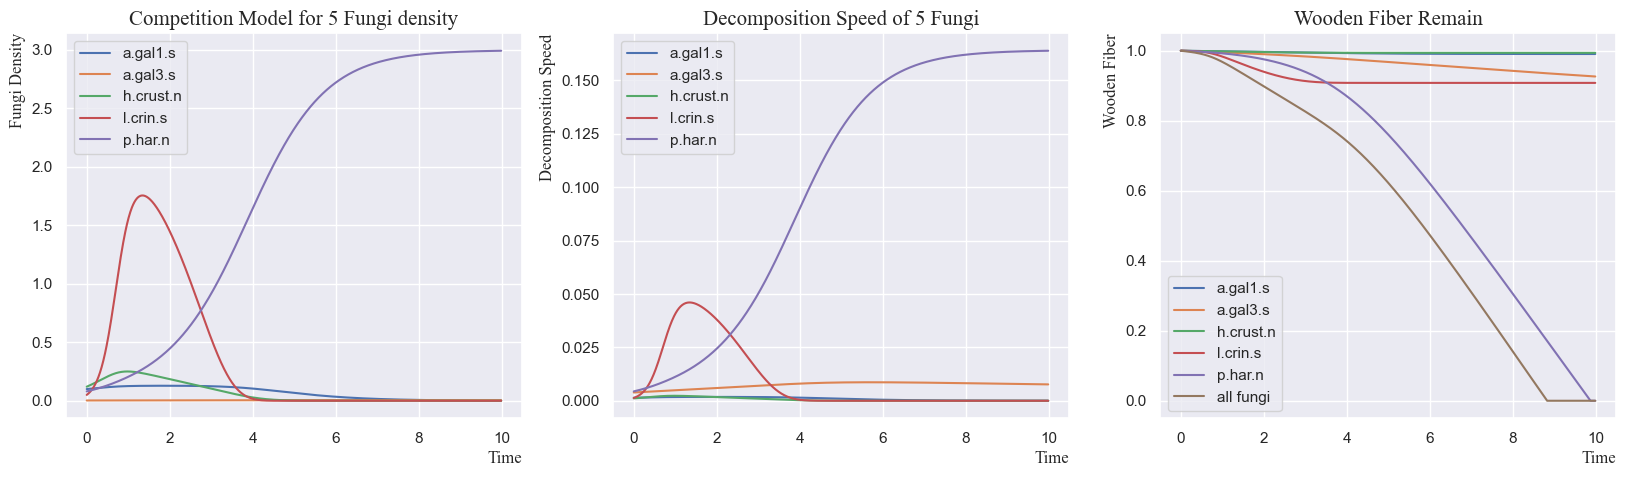

In [234]:
### implement the competition model for 5 fungi
### data from temperature
r_a1 = a1_temp_data[p_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
r_a3 = a3_temp_data[t_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
r_hc = hc_temp_data[x_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
r_lc = lc_temp_data[x_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
r_ph = ph_temp_data[x_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
# print(r_p, r_t, r_x)
a1_Decomposition_rate = 0.1712/122
a3_Decomposition_rate = 0.4724/122
hc_Decomposition_rate = 0.1362/122
lc_Decomposition_rate = 0.1601/122
ph_Decomposition_rate = 0.5350/122

n_a1, n_a3, n_hc, n_lc, n_ph = 3, 3, 3, 3, 3
### unit of density: s micrograms dry mass per cubic centimer at 1 cm to g/m3
init_a1, init_a3, init_hc, init_lc, init_ph = 0.1, 0.002375, 0.12, 0.05, 0.08
time = np.arange(0, 10, 0.01)
loss_5_species = competition_model_five_species(r_a1, r_a3, r_hc, r_lc, r_ph, a1_Decomposition_rate, a3_Decomposition_rate, hc_Decomposition_rate, lc_Decomposition_rate, ph_Decomposition_rate, n_a1, n_a3, n_hc, n_lc,n_ph, init_a1, init_a3, init_hc, init_lc, init_ph, time)

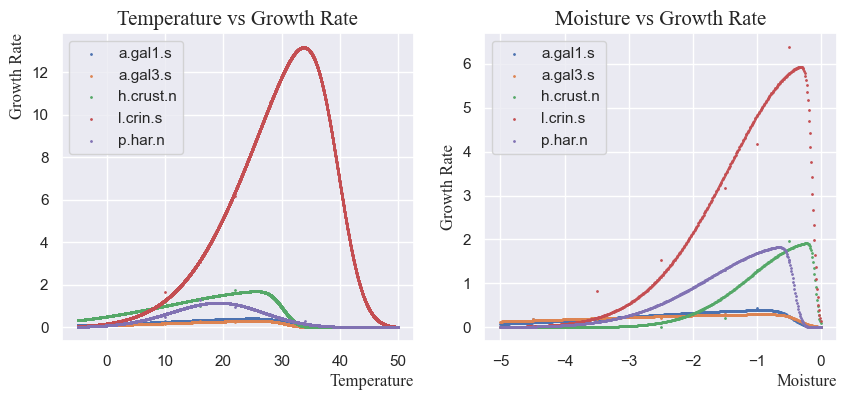

In [213]:
### plot the temperature data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Temperature vs Growth Rate', font={'family': 'Times New Roman', 'size': 15})
plt.ylabel("Growth Rate", font={'family': 'Times New Roman', 'size': 12}, loc='top')
plt.xlabel("Temperature", font={'family': 'Times New Roman', 'size': 12}, loc='right')
plt.scatter(a1_temp_data['temp_c'], a1_temp_data['hyphal_rate'], label='a.gal1.s', s=1)
plt.scatter(a3_temp_data['temp_c'], a3_temp_data['hyphal_rate'], label='a.gal3.s', s=1)
plt.scatter(hc_temp_data['temp_c'], hc_temp_data['hyphal_rate'], label='h.crust.n', s=1)
plt.scatter(lc_temp_data['temp_c'], lc_temp_data['hyphal_rate'], label='l.crin.s', s=1)
plt.scatter(ph_temp_data['temp_c'], ph_temp_data['hyphal_rate'], label='p.har.n', s=1)
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Moisture vs Growth Rate', font={'family': 'Times New Roman', 'size': 15})
plt.ylabel("Growth Rate", font={'family': 'Times New Roman', 'size': 12} )
plt.xlabel("Moisture", font={'family': 'Times New Roman', 'size': 12}, loc='right')
plt.scatter(a1_moist_data['matric_pot'], a1_moist_data['hyphal_rate'], label='a.gal1.s', s=1)
plt.scatter(a3_moist_data['matric_pot'], a3_moist_data['hyphal_rate'], label='a.gal3.s', s=1)
plt.scatter(hc_moist_data['matric_pot'], hc_moist_data['hyphal_rate'], label='h.crust.n', s=1)
plt.scatter(lc_moist_data['matric_pot'], lc_moist_data['hyphal_rate'], label='l.crin.s', s=1)
plt.scatter(ph_moist_data['matric_pot'], ph_moist_data['hyphal_rate'], label='p.har.n', s=1)
plt.legend()
plt.show()

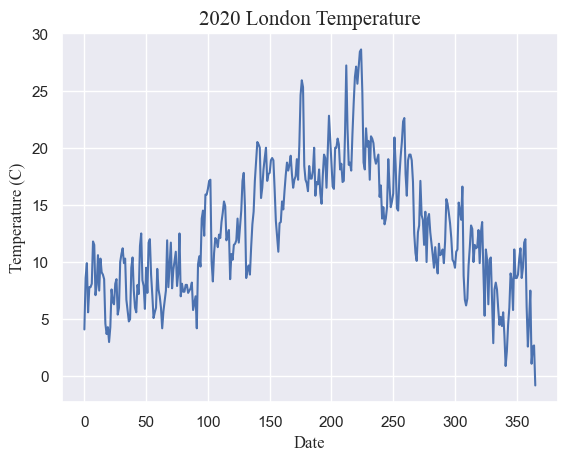

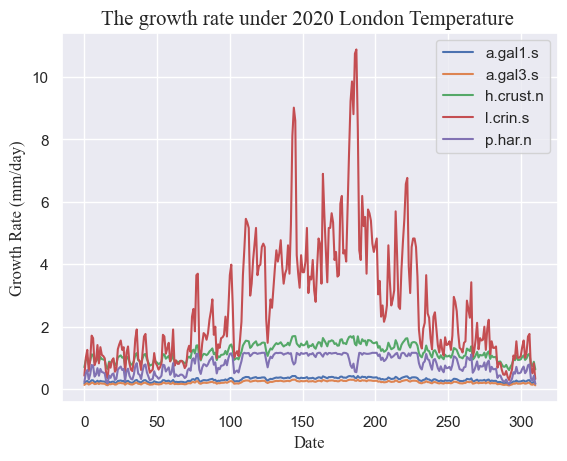

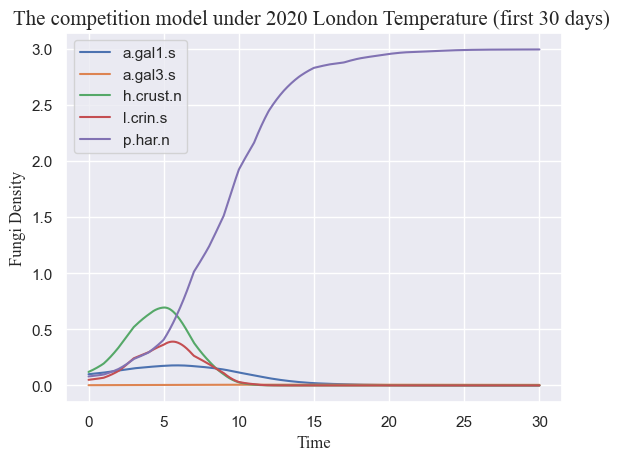

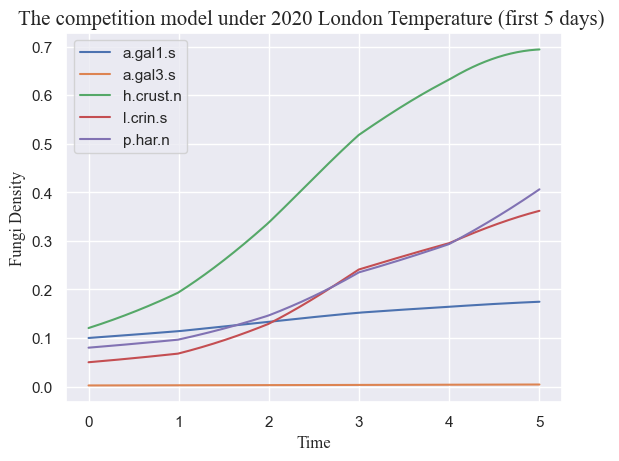

In [214]:
### read in the London temperature data and plot the competition model under different temperature
london_weather = pd.read_csv('./original_data/london_weather.csv')
london_temp = pd.DataFrame({"date": np.linspace(0, 365, 366), 
                            "mean_temp": london_weather["mean_temp"][-366:], 
                            "max_temp": london_weather["max_temp"][-366:], 
                            "min_temp": london_weather["min_temp"][-366:]})
london_temp = london_temp.reset_index(drop=True)
london_temp.dropna(axis = 0, subset=["mean_temp"], inplace=True)
plt.title('2020 London Temperature', font={'family': 'Times New Roman', 'size': 15})
plt.xlabel('Date', font={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Temperature (C)', font={'family': 'Times New Roman', 'size': 12})
plt.plot(london_temp["date"], london_temp["mean_temp"])
plt.show()
a1, a3, hc, lc, ph = [], [], [], [], []
for temp in london_temp["mean_temp"]:
    if(len(a1_temp_data[a1_temp_data["temp_c"] == temp]["hyphal_rate"].values) > 0):
        a1.append(a1_temp_data[a1_temp_data["temp_c"] == temp]["hyphal_rate"].values[0])
    if(len(a3_temp_data[a3_temp_data["temp_c"] == temp]["hyphal_rate"].values) > 0):
        a3.append(a3_temp_data[a3_temp_data["temp_c"] == temp]["hyphal_rate"].values[0])
    if(len(hc_temp_data[hc_temp_data["temp_c"] == temp]["hyphal_rate"].values) > 0):
        hc.append(hc_temp_data[hc_temp_data["temp_c"] == temp]["hyphal_rate"].values[0])
    if(len(lc_temp_data[lc_temp_data["temp_c"] == temp]["hyphal_rate"].values) > 0):
        lc.append(lc_temp_data[lc_temp_data["temp_c"] == temp]["hyphal_rate"].values[0])
    if(len(ph_temp_data[ph_temp_data["temp_c"] == temp]["hyphal_rate"].values) > 0):
        ph.append(ph_temp_data[ph_temp_data["temp_c"] == temp]["hyphal_rate"].values[0])
plt.title('The growth rate under 2020 London Temperature ', font={'family': 'Times New Roman', 'size': 15})
plt.xlabel('Date', font={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Growth Rate (mm/day)', font={'family': 'Times New Roman', 'size': 12})
plt.plot(np.arange(0, len(a1)), a1, label="a.gal1.s")
plt.plot(np.arange(0, len(a3)), a3, label="a.gal3.s")
plt.plot(np.arange(0, len(hc)), hc, label="h.crust.n")
plt.plot(np.arange(0, len(lc)), lc, label="l.crin.s")
plt.plot(np.arange(0, len(ph)), ph, label="p.har.n")
plt.legend()
plt.show()
def flunc_model(r_a, r_f, r_h, r_l, r_m, a_Decomposition_rate, f_Decomposition_rate, h_Decomposition_rate, l_Decomposition_rate, m_Decomposition_rate, n_a, n_f, n_h, n_l,n_m, time, new_init):
    time_list = [np.arange(0, 0.01, 0.001)]*100
    solution_list = []
    new_init = new_init
    s_af, s_ah, s_al, s_am = f_Decomposition_rate/a_Decomposition_rate, h_Decomposition_rate/a_Decomposition_rate, l_Decomposition_rate/a_Decomposition_rate, m_Decomposition_rate/a_Decomposition_rate
    s_fa, s_fh, s_fl, s_fm = a_Decomposition_rate/f_Decomposition_rate, h_Decomposition_rate/f_Decomposition_rate, l_Decomposition_rate/f_Decomposition_rate, m_Decomposition_rate/f_Decomposition_rate
    s_ha, s_hf, s_hl, s_hm = a_Decomposition_rate/h_Decomposition_rate, f_Decomposition_rate/h_Decomposition_rate, l_Decomposition_rate/h_Decomposition_rate, m_Decomposition_rate/h_Decomposition_rate
    s_la, s_lf, s_lh, s_lm = a_Decomposition_rate/l_Decomposition_rate, f_Decomposition_rate/l_Decomposition_rate, h_Decomposition_rate/l_Decomposition_rate, m_Decomposition_rate/l_Decomposition_rate
    s_ma, s_mf, s_mh, s_ml = a_Decomposition_rate/m_Decomposition_rate, f_Decomposition_rate/m_Decomposition_rate, h_Decomposition_rate/m_Decomposition_rate, l_Decomposition_rate/m_Decomposition_rate
    for time in time_list:
        solution = odeint(diff_five_species, new_init, time, args=(r_a, r_f, r_h, r_l, r_m, a_Decomposition_rate, f_Decomposition_rate, h_Decomposition_rate, l_Decomposition_rate, m_Decomposition_rate, n_a, n_f, n_h, n_l,n_m,\
            s_af, s_ah, s_al, s_am,\
                s_fa, s_fh, s_fl, s_fm,\
                    s_ha, s_hf, s_hl, s_hm, \
                        s_la, s_lf, s_lh, s_lm, \
                            s_ma, s_mf, s_mh, s_ml))
        solution = solution[-1]
        new_init = solution
        solution_list.append(solution)
    return solution_list
def doModel(a1, a3, hc, lc, ph, total_time):
    solution_list = []
    new_init = [init_a1, init_a3, init_hc, init_lc, init_ph]
    for time in range(total_time):
        r_a1, r_a3, r_hc, r_lc, r_ph = a1[time], a3[time], hc[time], lc[time], ph[time]
        temporary_solution_list = flunc_model(r_a1, r_a3, r_hc, r_lc, r_ph, a1_Decomposition_rate, a3_Decomposition_rate, hc_Decomposition_rate, lc_Decomposition_rate, ph_Decomposition_rate, n_a1, n_a3, n_hc, n_lc, n_ph, time, new_init)
        new_init = temporary_solution_list[-1]
        solution_list = solution_list + temporary_solution_list
    solution_list = np.array(solution_list)
    return solution_list[:, 0], solution_list[:, 1], solution_list[:, 2], solution_list[:, 3], solution_list[:, 4]
    
a1_solution, a3_solution, hc_solution, lc_solution, ph_solution = doModel(a1, a3, hc, lc, ph, 30)
plt.title('The competition model under 2020 London Temperature (first 30 days) ', font={'family': 'Times New Roman', 'size': 15})
plt.ylabel("Fungi Density", font={'family': 'Times New Roman', 'size': 12})
plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12})
plt.plot(np.linspace(0, 30 ,len(a1_solution)), a1_solution, label="a.gal1.s")
plt.plot(np.linspace(0, 30, len(a3_solution)), a3_solution, label="a.gal3.s")
plt.plot(np.linspace(0, 30, len(hc_solution)), hc_solution, label="h.crust.n")
plt.plot(np.linspace(0, 30, len(lc_solution)), lc_solution, label="l.crin.s")
plt.plot(np.linspace(0, 30, len(ph_solution)), ph_solution, label="p.har.n")
plt.legend()
plt.show()
plt.title('The competition model under 2020 London Temperature (first 5 days) ', font={'family': 'Times New Roman', 'size': 15})
plt.ylabel("Fungi Density", font={'family': 'Times New Roman', 'size': 12} )
plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12})
plt.plot(np.linspace(0, 5, 500), a1_solution[:500], label="a.gal1.s")
plt.plot(np.linspace(0, 5, 500), a3_solution[:500], label="a.gal3.s")
plt.plot(np.linspace(0, 5, 500), hc_solution[:500], label="h.crust.n")
plt.plot(np.linspace(0, 5, 500), lc_solution[:500], label="l.crin.s")
plt.plot(np.linspace(0, 5, 500), ph_solution[:500], label="p.har.n")
plt.legend()
plt.show()

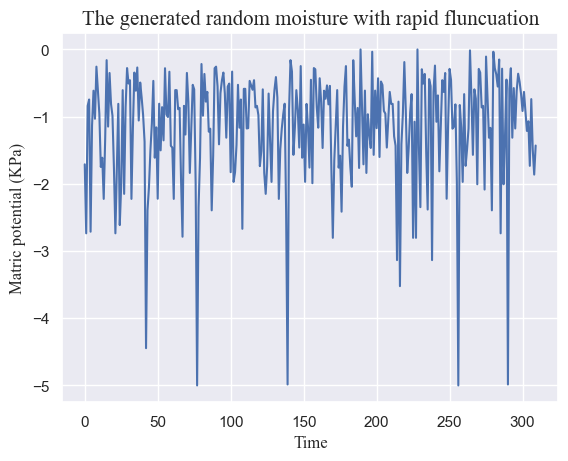

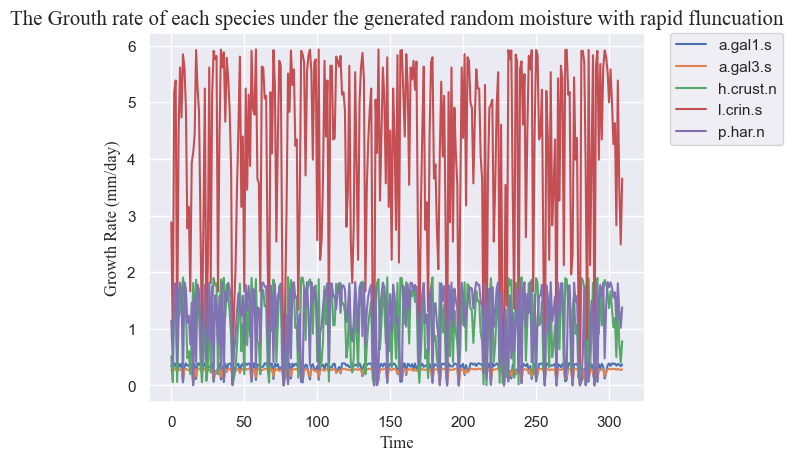

In [215]:
def get_data(shape, scale):
    data = np.random.gamma(abs(shape), scale, 310)
    if shape > 0:
        return (data - min(data))/(max(data)-min(data)) * -5
    elif shape < 0:
        return -5 - (data - min(data))/(max(data)-min(data)) * -5
### implement the moisture fluncuation of 5 fungi
s = get_data(2, 0.5)
### generate random data by s
random_data = np.random.choice(s, 310)
plt.title('The generated random moisture with rapid fluncuation', font={'family': 'Times New Roman', 'size': 15})
plt.xlabel('Time', font={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Matric potential (KPa)', font={'family': 'Times New Roman', 'size': 12})
plt.plot(np.arange(0, 310), random_data)
plt.show()
random_data = [round(i, 2) for i in random_data]
a1_moist, a3_moist, hc_moist, lc_moist, ph_moist = [], [], [], [], []
for moisture in random_data:
    a1_moist.append(a1_moist_data[a1_moist_data['matric_pot'] == moisture]['hyphal_rate'].values[0])
    a3_moist.append(a3_moist_data[a3_moist_data['matric_pot'] == moisture]['hyphal_rate'].values[0])
    hc_moist.append(hc_moist_data[hc_moist_data['matric_pot'] == moisture]['hyphal_rate'].values[0])
    lc_moist.append(lc_moist_data[lc_moist_data['matric_pot'] == moisture]['hyphal_rate'].values[0])
    ph_moist.append(ph_moist_data[ph_moist_data['matric_pot'] == moisture]['hyphal_rate'].values[0])
plt.title('The Grouth rate of each species under the generated random moisture with rapid fluncuation', font={'family': 'Times New Roman', 'size': 15})
plt.xlabel('Time', font={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Growth Rate (mm/day)', font={'family': 'Times New Roman', 'size': 12})
plt.plot(np.arange(0, 310), a1_moist, label="a.gal1.s")
plt.plot(np.arange(0, 310), a3_moist, label="a.gal3.s")
plt.plot(np.arange(0, 310), hc_moist, label="h.crust.n")
plt.plot(np.arange(0, 310), lc_moist, label="l.crin.s")
plt.plot(np.arange(0, 310), ph_moist, label="p.har.n")
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

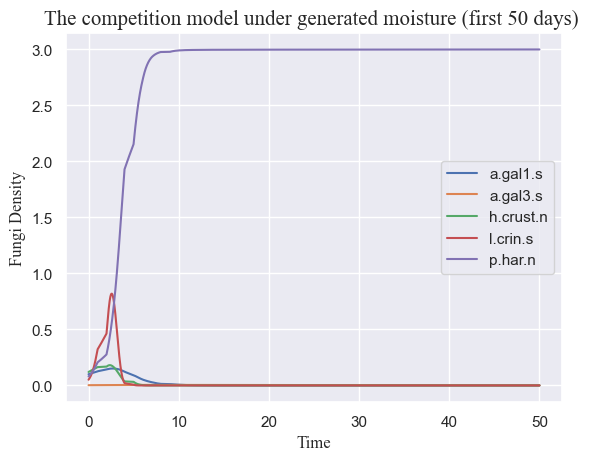

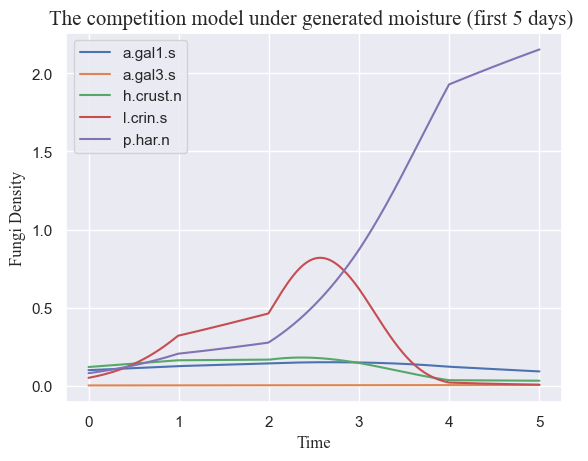

In [216]:
### plot the model with random moisture
solution_list = []
new_init = [init_a1, init_a3, init_hc, init_lc, init_ph]
total_time = 50
partial_time = 5
for time in range(total_time):
    r_a1, r_a3, r_hc, r_lc, r_ph = a1_moist[time], a3_moist[time], hc_moist[time], lc_moist[time], ph_moist[time]
    temporary_solution_list = flunc_model(r_a1, r_a3, r_hc, r_lc, r_ph, a1_Decomposition_rate, a3_Decomposition_rate, hc_Decomposition_rate, lc_Decomposition_rate, ph_Decomposition_rate, n_a1, n_a3, n_hc, n_lc,n_ph, time, new_init)
    new_init = temporary_solution_list[-1]
    solution_list = solution_list + temporary_solution_list
solution_list = np.array(solution_list)
a1_solution, a3_solution, ch_solution, cl_solution, hp_solution = solution_list[:, 0], solution_list[:, 1], solution_list[:, 2], solution_list[:, 3], solution_list[:, 4]
plt.title('The competition model under generated moisture (first {} days) '.format(total_time), font={'family': 'Times New Roman', 'size': 15})
plt.ylabel("Fungi Density", font={'family': 'Times New Roman', 'size': 12} )
plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12})
plt.plot(np.linspace(0, total_time ,len(a1_solution)), a1_solution, label="a.gal1.s")
plt.plot(np.linspace(0, total_time, len(a3_solution)), a3_solution, label="a.gal3.s")
plt.plot(np.linspace(0, total_time, len(ch_solution)), ch_solution, label="h.crust.n")
plt.plot(np.linspace(0, total_time, len(cl_solution)), cl_solution, label="l.crin.s")
plt.plot(np.linspace(0, total_time, len(hp_solution)), hp_solution, label="p.har.n")
plt.legend()
plt.show()
plt.title('The competition model under generated moisture (first {} days) '.format(partial_time), font={'family': 'Times New Roman', 'size': 15})
plt.ylabel("Fungi Density", font={'family': 'Times New Roman', 'size': 12} )
plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12})
plt.plot(np.linspace(0, partial_time, partial_time*100), a1_solution[:(partial_time * 100)], label="a.gal1.s")
plt.plot(np.linspace(0, partial_time, partial_time*100), a3_solution[:(partial_time * 100)], label="a.gal3.s")
plt.plot(np.linspace(0, partial_time, partial_time*100), ch_solution[:(partial_time * 100)], label="h.crust.n")
plt.plot(np.linspace(0, partial_time, partial_time*100), cl_solution[:(partial_time * 100)], label="l.crin.s")
plt.plot(np.linspace(0, partial_time, partial_time*100), hp_solution[:(partial_time * 100)], label="p.har.n")
plt.legend()
plt.show()

In [217]:
### start of part C
print("--------------------------------------------")
print("--------------------------------------------")
print("The part below is the part C")
print("--------------------------------------------")
print("--------------------------------------------")

--------------------------------------------
--------------------------------------------
The part below is the part C
--------------------------------------------
--------------------------------------------


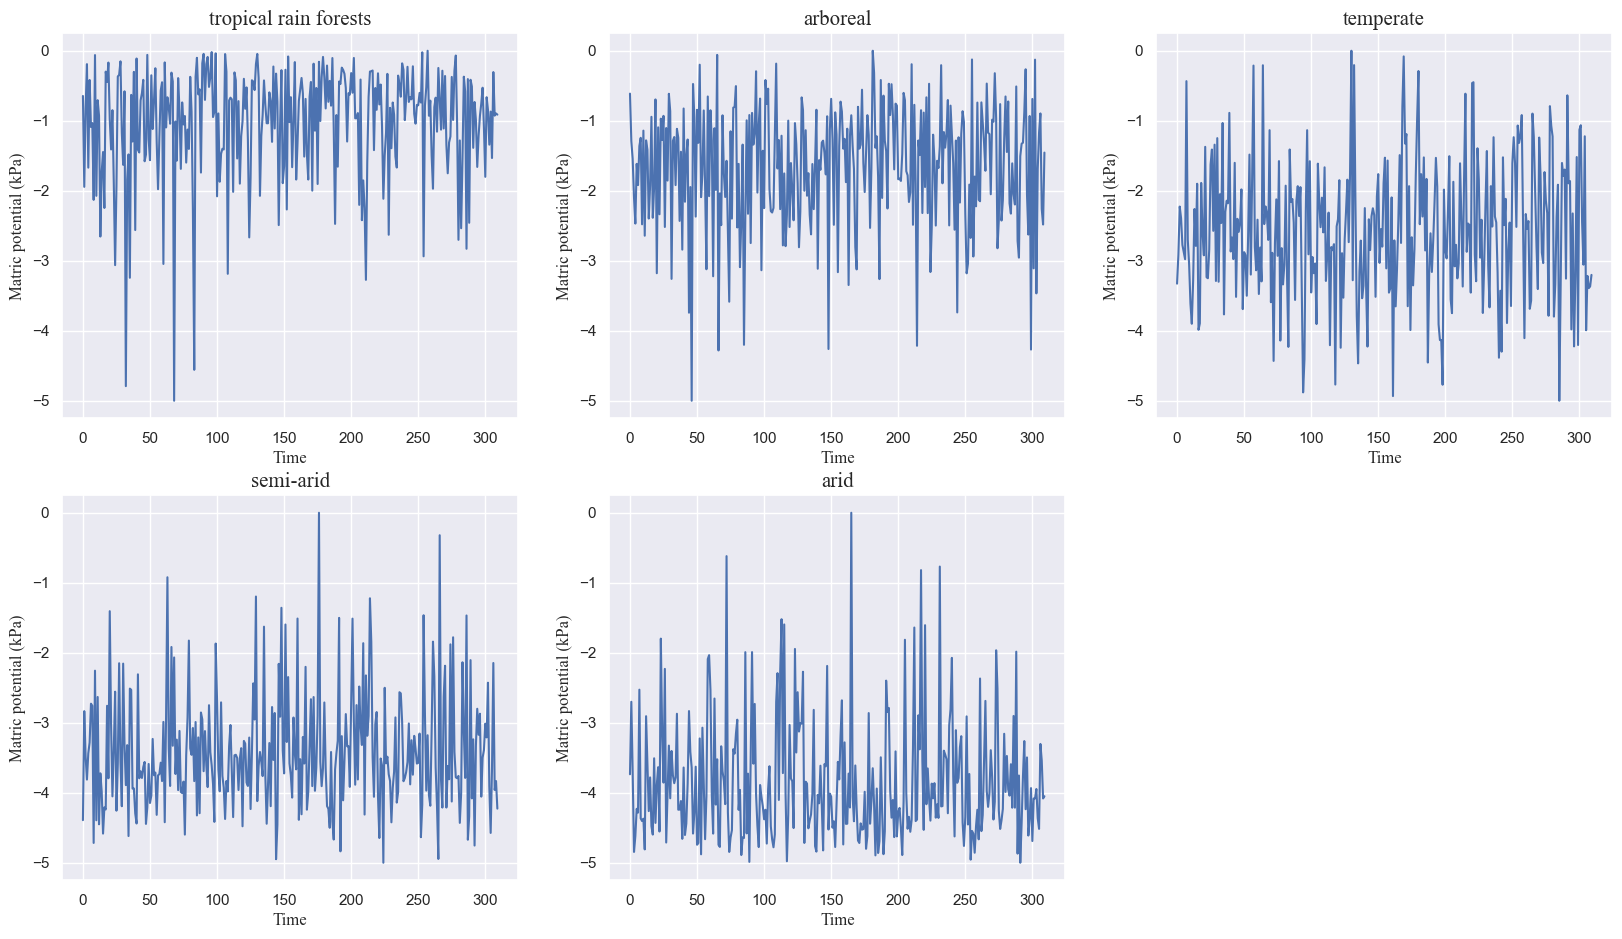

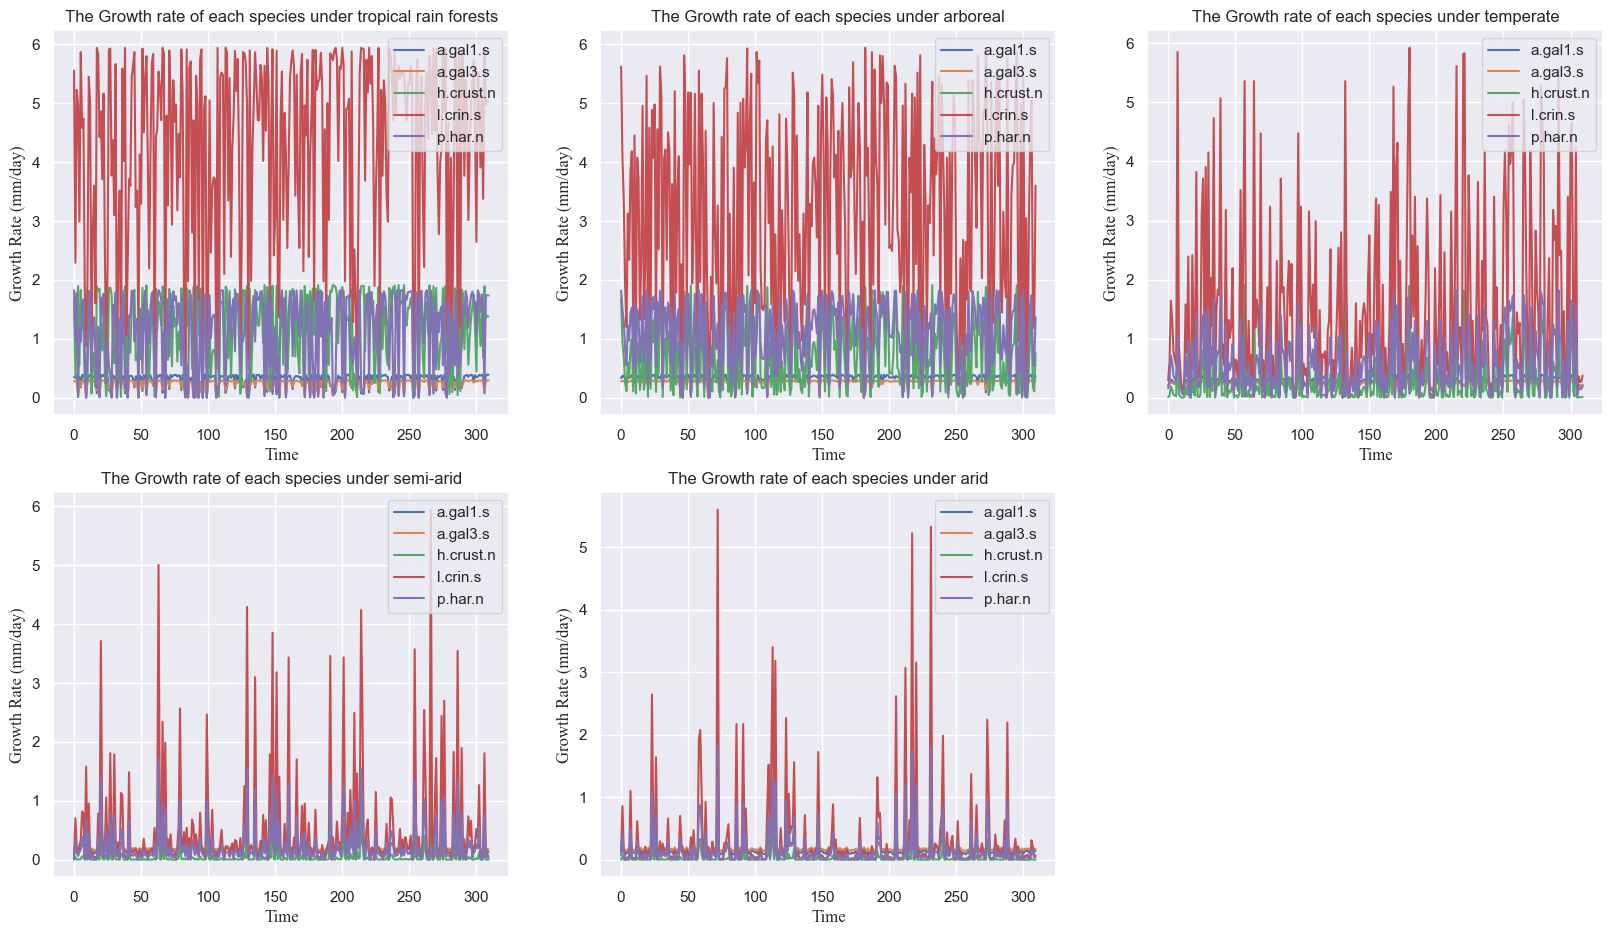

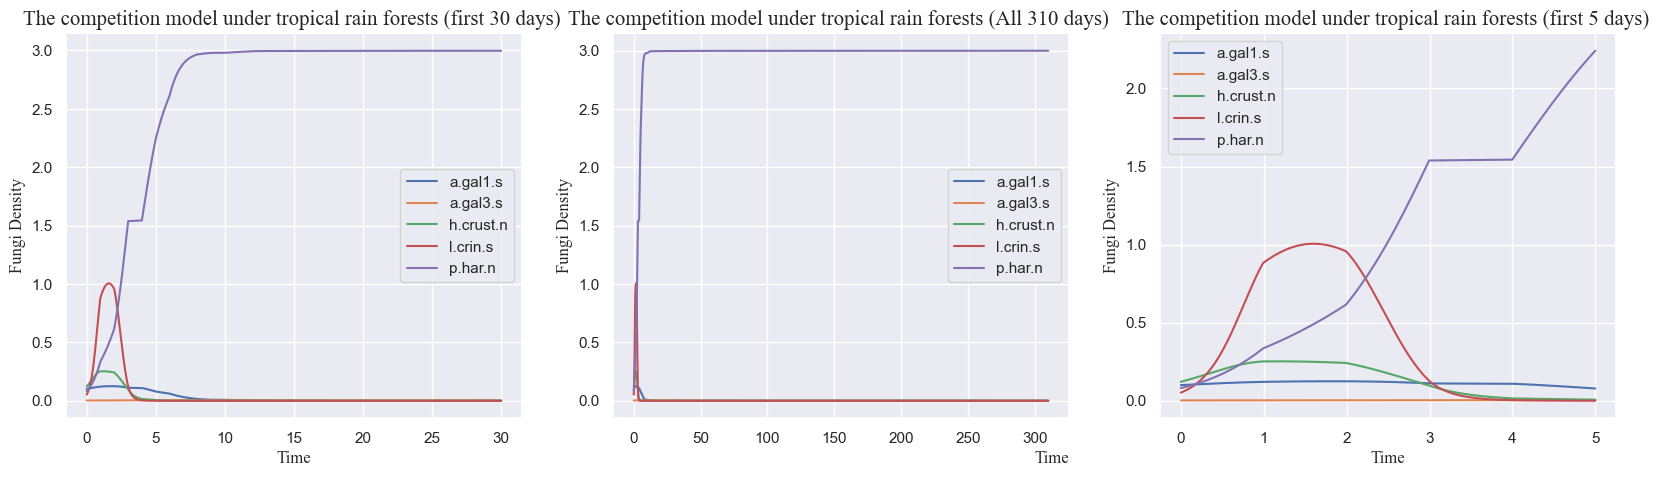

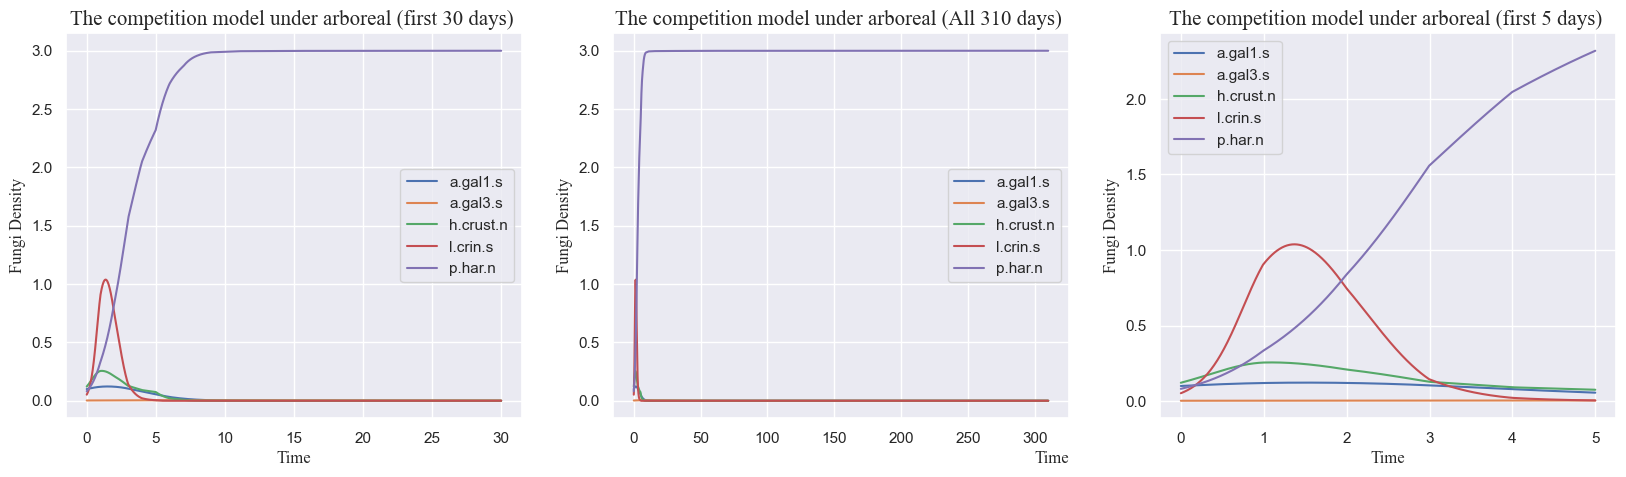

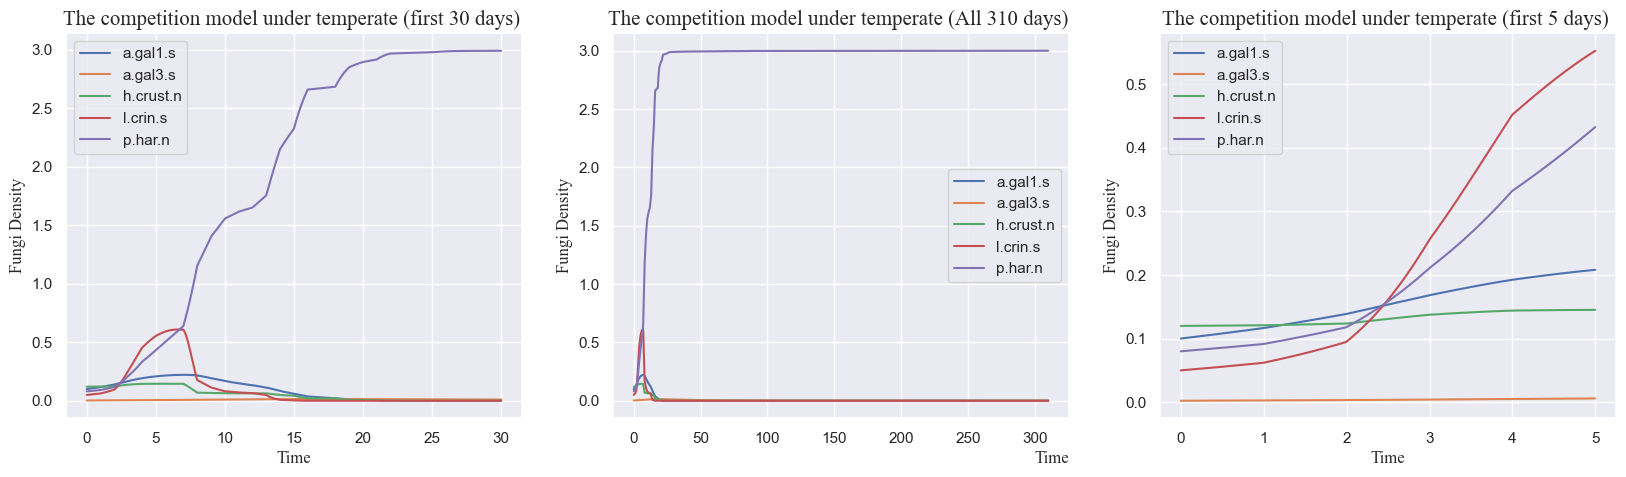

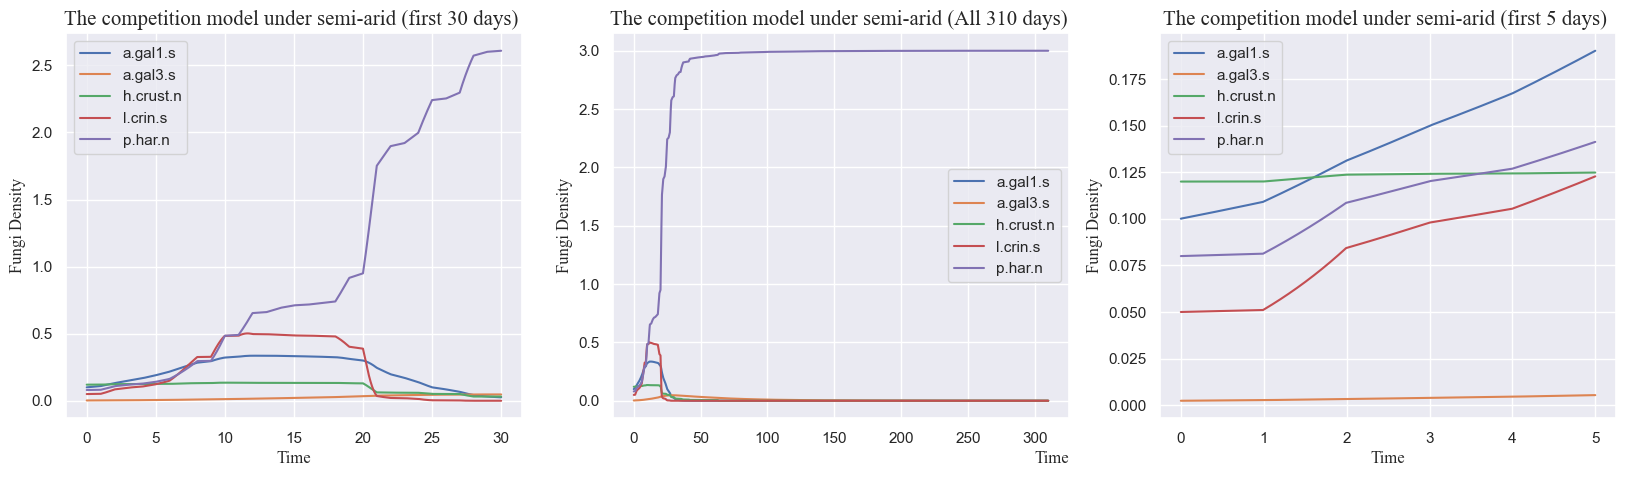

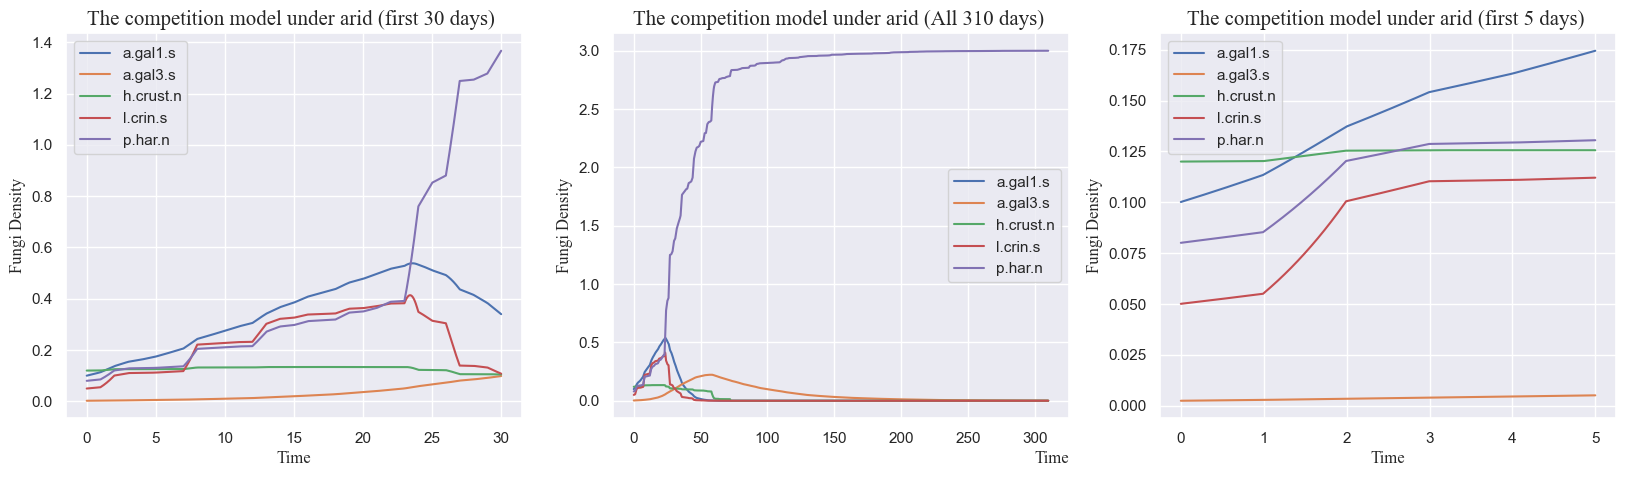

In [218]:
### plot the model with random moisture under different moisture level (arid, semi-arid, temperate, arboreal, tropical rain forests)

plt.figure(figsize=(20,11))
alpha = [2, 8, 20000, -8, -2]
labels = ["tropical rain forests", "arboreal", "temperate", "semi-arid", "arid"]
random_moist_data = []
for i in range(5):
    random_moist_data.append(get_data(alpha[i], 0.5))
    plt.subplot(2,3,i+1)
    plt.title(labels[i], font={'family': 'Times New Roman', 'size': 15})
    plt.plot(np.arange(0,310), random_moist_data[-1])
    plt.ylabel('Matric potential (kPa)', font={'family': 'Times New Roman', 'size': 12})
    plt.xlabel('Time', font={'family': 'Times New Roman', 'size': 12})
plt.show()

plt.figure(figsize=(20,11))
a1_moist_list, a3_moist_list, hc_moist_list, lc_moist_list, ph_moist_list = [], [], [], [], []
for i in range(5):
    moist_data = [round(i, 2) for i in random_moist_data[i]]
    a1_moist, a3_moist, hc_moist, lc_moist, ph_moist = [], [], [], [], []
    for moisture in moist_data:
        a1_moist.append(a1_moist_data[a1_moist_data['matric_pot'] == moisture]['hyphal_rate'].values[0])
        a3_moist.append(a3_moist_data[a3_moist_data['matric_pot'] == moisture]['hyphal_rate'].values[0])
        hc_moist.append(hc_moist_data[hc_moist_data['matric_pot'] == moisture]['hyphal_rate'].values[0])
        lc_moist.append(lc_moist_data[lc_moist_data['matric_pot'] == moisture]['hyphal_rate'].values[0])
        ph_moist.append(ph_moist_data[ph_moist_data['matric_pot'] == moisture]['hyphal_rate'].values[0])
    a1_moist_list.append(a1_moist)
    a3_moist_list.append(a3_moist)
    hc_moist_list.append(hc_moist)
    lc_moist_list.append(lc_moist)
    ph_moist_list.append(ph_moist)
    plt.subplot(2,3,i+1)
    plt.title('The Growth rate of each species under {}'.format(labels[i]))
    plt.xlabel('Time', font={'family': 'Times New Roman', 'size': 12})
    plt.ylabel('Growth Rate (mm/day)', font={'family': 'Times New Roman', 'size': 12})
    plt.plot(np.arange(0, 310), a1_moist, label="a.gal1.s")
    plt.plot(np.arange(0, 310), a3_moist, label="a.gal3.s")
    plt.plot(np.arange(0, 310), hc_moist, label="h.crust.n")
    plt.plot(np.arange(0, 310), lc_moist, label="l.crin.s")
    plt.plot(np.arange(0, 310), ph_moist, label="p.har.n")
    plt.legend(loc = 'upper right')
plt.show()


for i in range(5):
    solution_list = []
    new_init = [init_a1, init_a3, init_hc, init_lc, init_ph]
    a1_moist, a3_moist, hc_moist, lc_moist, ph_moist = a1_moist_list[i], a3_moist_list[i], hc_moist_list[i], lc_moist_list[i], ph_moist_list[i]
    for time in range(310):
        r_a1, r_a3, r_hc, r_lc, r_ph = a1_moist[time], a3_moist[time], hc_moist[time], lc_moist[time], ph_moist[time]
        temporary_solution_list = flunc_model(r_a1, r_a3, r_hc, r_lc, r_ph, a1_Decomposition_rate, a3_Decomposition_rate, hc_Decomposition_rate, lc_Decomposition_rate, ph_Decomposition_rate, n_a1, n_a3, n_hc, n_lc,n_ph, time, new_init)
        new_init = temporary_solution_list[-1]
        solution_list = solution_list + temporary_solution_list
    solution_list = np.array(solution_list)
    a1_solution, a3_solution, hc_solution, lc_solution, ph_solution = solution_list[:, 0], solution_list[:, 1], solution_list[:, 2], solution_list[:, 3], solution_list[:, 4]
    plt.figure(figsize=(20,5))
    plt.subplot(1, 3, 1)
    plt.title('The competition model under {} (first 30 days) '.format(labels[i]), font={'family': 'Times New Roman', 'size': 15})
    plt.ylabel("Fungi Density", font={'family': 'Times New Roman', 'size': 12})
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12}) 
    plt.plot(np.linspace(0, 30 , 3000), a1_solution[:3000], label="a.gal1.s")
    plt.plot(np.linspace(0, 30, 3000), a3_solution[:3000], label="a.gal3.s")
    plt.plot(np.linspace(0, 30, 3000), hc_solution[:3000], label="h.crust.n")
    plt.plot(np.linspace(0, 30, 3000), lc_solution[:3000], label="l.crin.s")
    plt.plot(np.linspace(0, 30, 3000), ph_solution[:3000], label="p.har.n")
    plt.legend(loc = 'best')
    plt.subplot(1, 3, 2)
    plt.title('The competition model under {} (All 310 days) '.format(labels[i]), font={'family': 'Times New Roman', 'size': 15})
    plt.ylabel("Fungi Density", font={'family': 'Times New Roman', 'size': 12})
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12}, loc='right')
    plt.plot(np.linspace(0, 310, len(a1_solution)), a1_solution, label="a.gal1.s")
    plt.plot(np.linspace(0, 310, len(a3_solution)), a3_solution, label="a.gal3.s")
    plt.plot(np.linspace(0, 310, len(hc_solution)), hc_solution, label="h.crust.n")
    plt.plot(np.linspace(0, 310, len(lc_solution)), lc_solution, label="l.crin.s")
    plt.plot(np.linspace(0, 310, len(ph_solution)), ph_solution, label="p.har.n")
    plt.legend(loc = 'best')
    plt.subplot(1, 3, 3)
    plt.title('The competition model under {} (first 5 days) '.format(labels[i]), font={'family': 'Times New Roman', 'size': 15})
    plt.ylabel("Fungi Density", font={'family': 'Times New Roman', 'size': 12})
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12})
    plt.plot(np.linspace(0, 5, 500), a1_solution[:500], label="a.gal1.s")
    plt.plot(np.linspace(0, 5, 500), a3_solution[:500], label="a.gal3.s")
    plt.plot(np.linspace(0, 5, 500), hc_solution[:500], label="h.crust.n")
    plt.plot(np.linspace(0, 5, 500), lc_solution[:500], label="l.crin.s")
    plt.plot(np.linspace(0, 5, 500), ph_solution[:500], label="p.har.n")
    plt.legend(loc = 'best')
    plt.show()

In [219]:
### load and process the data of five cities
pheonix_temp  = pd.read_csv('./original_data/temp_arizona_phoenix.csv')
san_angelo_temp = pd.read_csv('./original_data/temp_san_antonio.csv')
washington_temp = pd.read_csv('./original_data/temp_washington.csv')
brainerd_temp = pd.read_csv('./original_data/temp_brainerd.csv')
birmingham_temp = pd.read_csv('./original_data/temp_birmingham.csv')
pheonix_temp.drop(columns=["Year"], inplace=True)
san_angelo_temp.drop(columns=["Year"], inplace=True)
washington_temp.drop(columns=["Year"], inplace=True)
brainerd_temp.drop(columns=["Year"], inplace=True)
birmingham_temp.drop(columns=["Year"], inplace=True)
arid_data = []
semi_arid_data = []
temperate_data = []
aboreal_data = []
rain_forest_data = []
for column in pheonix_temp:
    arid_data += pheonix_temp[column].tolist()
    semi_arid_data += san_angelo_temp[column].tolist()
    temperate_data += washington_temp[column].tolist()
    aboreal_data += brainerd_temp[column].tolist()
    rain_forest_data += birmingham_temp[column].tolist()
### convert F to C
arid_data = [(x - 32) * 5/9 for x in arid_data]
arid_data = [round(x, 2) for x in arid_data]
semi_arid_data = [(x - 32) * 5/9 for x in semi_arid_data]
semi_arid_data = [round(x, 2) for x in semi_arid_data]
temperate_data = [(x - 32) * 5/9 for x in temperate_data]
temperate_data = [round(x, 2) for x in temperate_data]
aboreal_data = [(x - 32) * 5/9 for x in aboreal_data]
aboreal_data = [round(x, 2) for x in aboreal_data]
rain_forest_data = [(x - 32) * 5/9 for x in rain_forest_data]
rain_forest_data = [round(x, 2) for x in rain_forest_data]

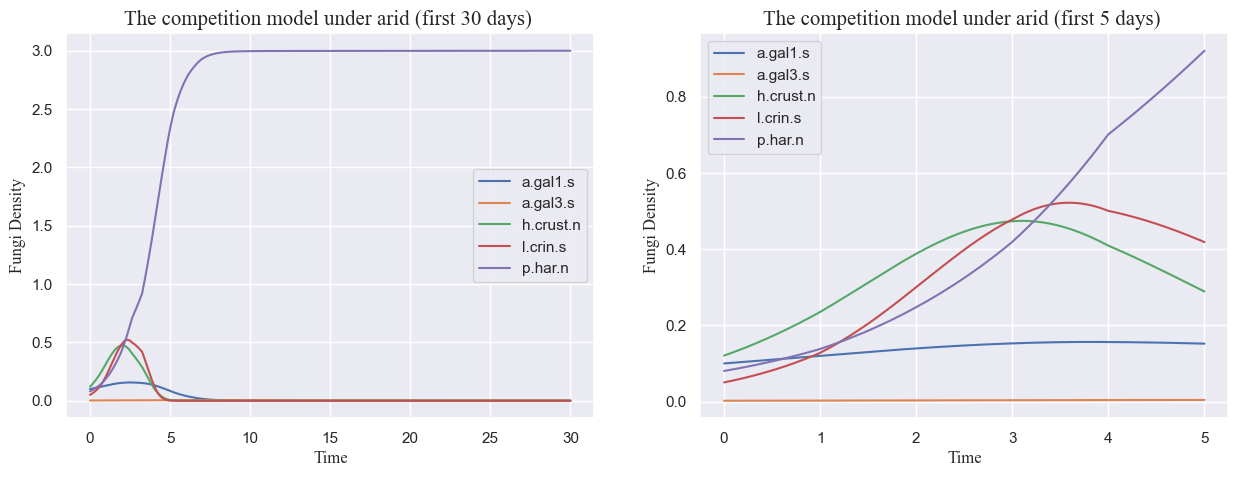

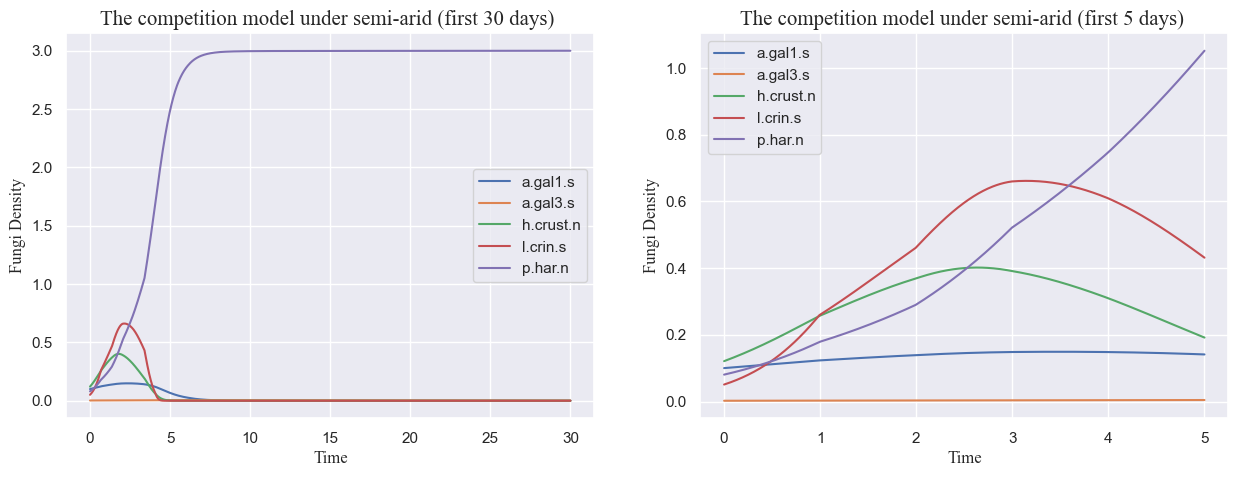

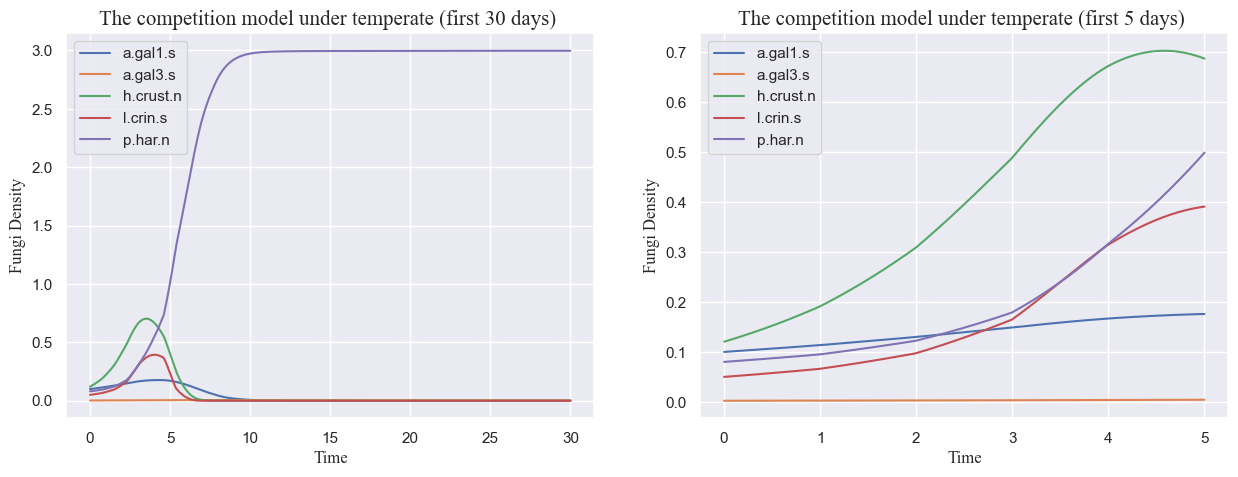

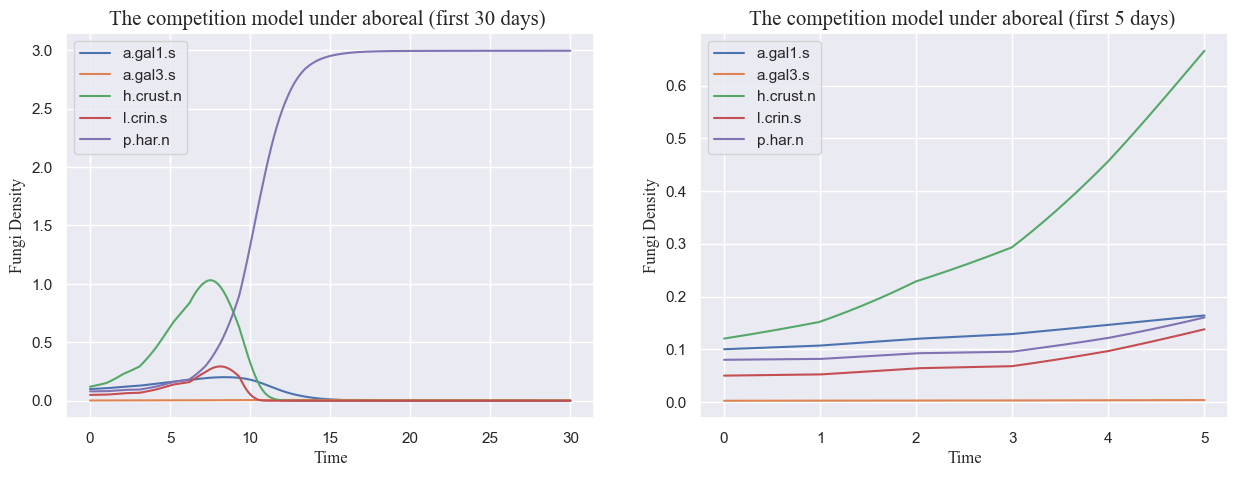

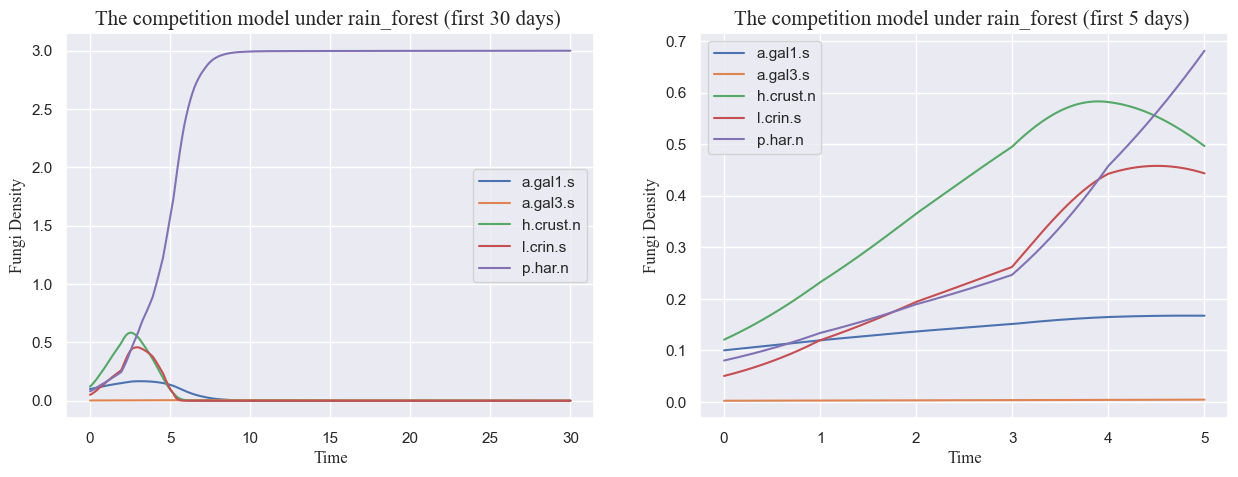

In [220]:
### implement the competition model of five cities' temperatures
datasets = [arid_data, semi_arid_data, temperate_data, aboreal_data, rain_forest_data]
label = ['arid', 'semi-arid', 'temperate', 'aboreal', 'rain_forest']

for index, data in enumerate(datasets):
    plt.figure(figsize=(15,5))
    a1, a3, hc, lc, ph =[], [], [], [], []
    for temp in data:
        if(len(a1_temp_data[a1_temp_data['temp_c'] == temp]['hyphal_rate']) > 0):
            a1.append(a1_temp_data[a1_temp_data['temp_c'] == temp]['hyphal_rate'].values[0])
        if(len(a3_temp_data[a3_temp_data['temp_c'] == temp]['hyphal_rate']) > 0):
            a3.append(a3_temp_data[a3_temp_data['temp_c'] == temp]['hyphal_rate'].values[0])
        if(len(hc_temp_data[hc_temp_data['temp_c'] == temp]['hyphal_rate']) > 0):
            hc.append(hc_temp_data[hc_temp_data['temp_c'] == temp]['hyphal_rate'].values[0])
        if(len(lc_temp_data[lc_temp_data['temp_c'] == temp]['hyphal_rate']) > 0):
            lc.append(lc_temp_data[lc_temp_data['temp_c'] == temp]['hyphal_rate'].values[0])
        if(len(ph_temp_data[ph_temp_data['temp_c'] == temp]['hyphal_rate']) > 0):
            ph.append(ph_temp_data[ph_temp_data['temp_c'] == temp]['hyphal_rate'].values[0])
    a1_solution, a3_solution, hc_solution, lc_solution, ph_solution = doModel(a1, a3, hc, lc, ph, len(a1))
    plt.subplot(1, 2, 1)
    plt.title('The competition model under {} (first 30 days) '.format(label[index]), font={'family': 'Times New Roman', 'size': 15})
    plt.ylabel("Fungi Density", font={'family': 'Times New Roman', 'size': 12})
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12})
    plt.plot(np.linspace(0, 30 ,len(a1_solution)), a1_solution, label="a.gal1.s")
    plt.plot(np.linspace(0, 30, len(a3_solution)), a3_solution, label="a.gal3.s")
    plt.plot(np.linspace(0, 30, len(hc_solution)), hc_solution, label="h.crust.n")
    plt.plot(np.linspace(0, 30, len(lc_solution)), lc_solution, label="l.crin.s")
    plt.plot(np.linspace(0, 30, len(ph_solution)), ph_solution, label="p.har.n")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title('The competition model under {} (first 5 days) '.format(label[index]), font={'family': 'Times New Roman', 'size': 15})
    plt.ylabel("Fungi Density", font={'family': 'Times New Roman', 'size': 12})
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12})
    plt.plot(np.linspace(0, 5, 500), a1_solution[:500], label="a.gal1.s")
    plt.plot(np.linspace(0, 5, 500), a3_solution[:500], label="a.gal3.s")
    plt.plot(np.linspace(0, 5, 500), hc_solution[:500], label="h.crust.n")
    plt.plot(np.linspace(0, 5, 500), lc_solution[:500], label="l.crin.s")
    plt.plot(np.linspace(0, 5, 500), ph_solution[:500], label="p.har.n")
    plt.legend()
    plt.show()

In [221]:
def flunc_model_3(r_a1, r_a3, r_hc, a1_Decomposition_rate, a3_Decomposition_rate, hc_Decomposition_rate, n_a1, n_a3, n_hc, time, new_init):
    time_list = [np.arange(0, 0.01, 0.001)]*100
    solution_list = []
    s_pt, s_px = a3_Decomposition_rate/a1_Decomposition_rate, hc_Decomposition_rate/a1_Decomposition_rate
    s_tp, s_tx = a1_Decomposition_rate/a3_Decomposition_rate, hc_Decomposition_rate/a3_Decomposition_rate
    s_xp, s_xt= a1_Decomposition_rate/hc_Decomposition_rate, a3_Decomposition_rate/hc_Decomposition_rate

    for time in time_list:
        solution = odeint(diff_three_species, new_init, time, args=(r_a1, r_a3, r_hc, n_a1, n_a3, n_hc, init_a1, init_a3, init_hc, s_pt, s_px, s_tp, s_tx, s_xp, s_xt))
        solution = solution[-1]
        solution_list.append(solution)
    return solution_list
def doModel_3(a1, a3, hc, total_time):
    solution_list = []
    new_init = [init_a1, init_a3, init_hc]
    for time in range(total_time):
        r_a1, r_a3, r_hc = a1[time], a3[time], hc[time]
        temporary_solution_list = flunc_model_3(r_a1, r_a3, r_hc, a1_Decomposition_rate, a3_Decomposition_rate, hc_Decomposition_rate, n_a1, n_a3, n_hc, time, new_init)
        new_init = temporary_solution_list[-1]
        solution_list = solution_list + temporary_solution_list
    solution_list = np.array(solution_list)
    return solution_list[:, 0], solution_list[:, 1], solution_list[:, 2]

In [222]:
temp_data = london_temp["mean_temp"].tolist()
moist_data_1, moist_data_2, moist_data_3, moist_data_4, moist_data_5= random_moist_data
moist_data_1 = [round(x, 2) for x in moist_data_1]
moist_data_2 = [round(x, 2) for x in moist_data_2]
moist_data_3 = [round(x, 2) for x in moist_data_3]
moist_data_4 = [round(x, 2) for x in moist_data_4]
moist_data_5 = [round(x, 2) for x in moist_data_5]
one_specie = [a1_temp_data, a1_moist_data]
five_species = [[a1_temp_data, a1_moist_data], [a3_temp_data, a3_moist_data], [hc_temp_data, hc_moist_data], [lc_temp_data, lc_moist_data], [ph_temp_data, ph_moist_data]]
init_a1, init_a3, init_hc, init_lc, init_ph = 0.1, 0.002375, 0.12, 0.05, 0.08
### measure temperature first
total_time = 310
partial_time = 5
time_list = [np.linspace(0, 1, 10)] * total_time
a1_hyphal_rate, a3_hyphal_rate, hc_hyphal_rate, lc_hyphal_rate, ph_hyphal_rate, p_hyphal_rate, t_hyphal_rate, x_hyphal_rate = [], [], [], [], [], [], [], []
for temperature in temp_data:
    if(len(a1_temp_data[a1_temp_data['temp_c'] == temperature]['hyphal_rate'].values) > 0):
        a1_hyphal_rate.append(a1_temp_data[a1_temp_data['temp_c'] == temperature]['hyphal_rate'].values[0])
    if(len(a3_temp_data[a3_temp_data['temp_c'] == temperature]['hyphal_rate'].values) > 0):
        a3_hyphal_rate.append(a3_temp_data[a3_temp_data['temp_c'] == temperature]['hyphal_rate'].values[0])
    if(len(hc_temp_data[hc_temp_data['temp_c'] == temperature]['hyphal_rate'].values) > 0):
        hc_hyphal_rate.append(hc_temp_data[hc_temp_data['temp_c'] == temperature]['hyphal_rate'].values[0])
    if(len(lc_temp_data[lc_temp_data['temp_c'] == temperature]['hyphal_rate'].values) > 0):
        lc_hyphal_rate.append(lc_temp_data[lc_temp_data['temp_c'] == temperature]['hyphal_rate'].values[0])
    if(len(ph_temp_data[ph_temp_data['temp_c'] == temperature]['hyphal_rate'].values) > 0):
        ph_hyphal_rate.append(ph_temp_data[ph_temp_data['temp_c'] == temperature]['hyphal_rate'].values[0])

a1_hyphal_rate_moist, a3_hyphal_rate_moist, hc_hyphal_rate_moist, lc_hyphal_rate_moist, ph_hyphal_rate_moist, p_hyphal_rate_moist, t_hyphal_rate_moist, x_hyphal_rate_moist = [], [], [], [], [], [], [], []
a1_hyphal_rate_moist_2, a3_hyphal_rate_moist_2, hc_hyphal_rate_moist_2, lc_hyphal_rate_moist_2, ph_hyphal_rate_moist_2, p_hyphal_rate_moist_2, t_hyphal_rate_moist_2, x_hyphal_rate_moist_2 = [], [], [], [], [], [], [], []
a1_hyphal_rate_moist_3, a3_hyphal_rate_moist_3, hc_hyphal_rate_moist_3, lc_hyphal_rate_moist_3, ph_hyphal_rate_moist_3, p_hyphal_rate_moist_3, t_hyphal_rate_moist_3, x_hyphal_rate_moist_3 = [], [], [], [], [], [], [], []
a1_hyphal_rate_moist_4, a3_hyphal_rate_moist_4, hc_hyphal_rate_moist_4, lc_hyphal_rate_moist_4, ph_hyphal_rate_moist_4, p_hyphal_rate_moist_4, t_hyphal_rate_moist_4, x_hyphal_rate_moist_4 = [], [], [], [], [], [], [], []
a1_hyphal_rate_moist_5, a3_hyphal_rate_moist_5, hc_hyphal_rate_moist_5, lc_hyphal_rate_moist_5, ph_hyphal_rate_moist_5, p_hyphal_rate_moist_5, t_hyphal_rate_moist_5, x_hyphal_rate_moist_5 = [], [], [], [], [], [], [], []

for moist in moist_data_1:
    if(len(a1_moist_data[a1_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        a1_hyphal_rate_moist.append(a1_moist_data[a1_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(a3_moist_data[a3_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        a3_hyphal_rate_moist.append(a3_moist_data[a3_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(hc_moist_data[hc_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        hc_hyphal_rate_moist.append(hc_moist_data[hc_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(lc_moist_data[lc_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        lc_hyphal_rate_moist.append(lc_moist_data[lc_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(ph_moist_data[ph_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        ph_hyphal_rate_moist.append(ph_moist_data[ph_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
for moist in moist_data_2:
    if(len(a1_moist_data[a1_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        a1_hyphal_rate_moist_2.append(a1_moist_data[a1_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(a3_moist_data[a3_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        a3_hyphal_rate_moist_2.append(a3_moist_data[a3_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(hc_moist_data[hc_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        hc_hyphal_rate_moist_2.append(hc_moist_data[hc_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(lc_moist_data[lc_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        lc_hyphal_rate_moist_2.append(lc_moist_data[lc_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(ph_moist_data[ph_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        ph_hyphal_rate_moist_2.append(ph_moist_data[ph_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
for moist in moist_data_3:
    if(len(a1_moist_data[a1_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        a1_hyphal_rate_moist_3.append(a1_moist_data[a1_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(a3_moist_data[a3_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        a3_hyphal_rate_moist_3.append(a3_moist_data[a3_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(hc_moist_data[hc_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        hc_hyphal_rate_moist_3.append(hc_moist_data[hc_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(lc_moist_data[lc_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        lc_hyphal_rate_moist_3.append(lc_moist_data[lc_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(ph_moist_data[ph_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        ph_hyphal_rate_moist_3.append(ph_moist_data[ph_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
for moist in moist_data_4:
    if(len(a1_moist_data[a1_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        a1_hyphal_rate_moist_4.append(a1_moist_data[a1_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(a3_moist_data[a3_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        a3_hyphal_rate_moist_4.append(a3_moist_data[a3_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(hc_moist_data[hc_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        hc_hyphal_rate_moist_4.append(hc_moist_data[hc_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(lc_moist_data[lc_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        lc_hyphal_rate_moist_4.append(lc_moist_data[lc_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(ph_moist_data[ph_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        ph_hyphal_rate_moist_4.append(ph_moist_data[ph_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
for moist in moist_data_5:
    if(len(a1_moist_data[a1_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        a1_hyphal_rate_moist_5.append(a1_moist_data[a1_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(a3_moist_data[a3_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        a3_hyphal_rate_moist_5.append(a3_moist_data[a3_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(hc_moist_data[hc_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        hc_hyphal_rate_moist_5.append(hc_moist_data[hc_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(lc_moist_data[lc_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        lc_hyphal_rate_moist_5.append(lc_moist_data[lc_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])
    if(len(ph_moist_data[ph_moist_data['matric_pot'] == moist]['hyphal_rate'].values) > 0):
        ph_hyphal_rate_moist_5.append(ph_moist_data[ph_moist_data['matric_pot'] == moist]['hyphal_rate'].values[0])



def diff_one_specie(a, time, r_a,  n_a=3):
    return np.array(r_a * a * (1-a/n_a))


def cal_diversity(a1_hyphal_rate, a3_hyphal_rate, hc_hyphal_rate, lc_hyphal_rate, ph_hyphal_rate, init_a1, init_a3, init_hc, init_lc, init_ph, datatype):
    total_time = 60
    partial_time = 5
    solution_list = []
    a1_capability = a1_Decomposition_rate/init_a1
    a3_capability = a3_Decomposition_rate/init_a3
    hc_capability = hc_Decomposition_rate/init_hc
    lc_capability = lc_Decomposition_rate/init_lc
    ph_capability = ph_Decomposition_rate/init_ph
    for time in range(total_time):
        t = time_list[time]
        r_a1 = a1_hyphal_rate[time]
        solution = odeint(diff_one_specie, init_a1, t, args = (r_a1,))[-1]
        init_a1 = solution
        solution_list.append(solution)
    solution_list = [solution.tolist()[0] for solution in solution_list]
    plt.title("The wooden fiber remain under {}".format(datatype), font={'family': 'Times New Roman', 'size': 15})
    plt.ylabel("Wooden Fiber", font={'family': 'Times New Roman', 'size': 12})
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12})
    a1_Decomposition_speed = [a1_capability * solution for solution in solution_list]
    a1_Decomposition_speed = np.array(a1_Decomposition_speed)
    wooden_fiber_loss_with_one_specie = calculate_wooden_fiber_loss(np.linspace(0, total_time,len(a1_Decomposition_speed)), a1_Decomposition_speed)
    for id in range(len(wooden_fiber_loss_with_one_specie)):
        if wooden_fiber_loss_with_one_specie[id] > 1:
            wooden_fiber_loss_with_one_specie[id] = 1
    plt.plot(np.linspace(0, total_time, len(wooden_fiber_loss_with_one_specie)), 1-wooden_fiber_loss_with_one_specie, label="a.gal1.s")
    ### 3 species
    init_a1, init_a3, init_hc, init_lc, init_ph = 0.1, 0.002375, 0.12, 0.05, 0.08
    a1_solution, a3_solution, hc_solution = doModel_3(a1_hyphal_rate, a3_hyphal_rate, hc_hyphal_rate, total_time)
    a1_Decomposition_speed = [a1_capability * solution for solution in a1_solution]
    a3_Decomposition_speed = [a3_capability * solution for solution in a3_solution]
    hc_Decomposition_speed = [hc_capability * solution for solution in hc_solution]
    a1_Decomposition_speed, a3_Decomposition_speed, hc_Decomposition_speed = np.array(a1_Decomposition_speed), np.array(a3_Decomposition_speed), np.array(hc_Decomposition_speed)
    a1_wooden_fiber_loss = calculate_wooden_fiber_loss(np.linspace(0, total_time,len(a1_Decomposition_speed)), a1_Decomposition_speed)
    a3_wooden_fiber_loss = calculate_wooden_fiber_loss(np.linspace(0, total_time,len(a3_Decomposition_speed)), a3_Decomposition_speed)
    hc_wooden_fiber_loss = calculate_wooden_fiber_loss(np.linspace(0, total_time, len(hc_Decomposition_speed)), hc_Decomposition_speed)
    wooden_fiber_loss_with_three_species = a1_wooden_fiber_loss + a3_wooden_fiber_loss + hc_wooden_fiber_loss
    for id in range(len(wooden_fiber_loss_with_three_species)):
        if wooden_fiber_loss_with_three_species[id] > 1:
            wooden_fiber_loss_with_three_species[id] = 1
    wooden_fiber_remain_with_three_species = [1 - element for element in wooden_fiber_loss_with_three_species]
    plt.plot(np.linspace(0, total_time, len(wooden_fiber_remain_with_three_species)), wooden_fiber_remain_with_three_species, label="3 species")
    ### 5 species
    init_a1, init_a3, init_hc, init_lc, init_ph = 0.1, 0.002375, 0.12, 0.05, 0.08
    a1_solution, a3_solution, hc_solution, lc_solution, ph_solution = doModel(a1_hyphal_rate, a3_hyphal_rate, hc_hyphal_rate, lc_hyphal_rate, ph_hyphal_rate, total_time)
    a1_Decomposition_speed = [a1_capability * solution for solution in a1_solution]
    a3_Decomposition_speed = [a3_capability * solution for solution in a3_solution]
    hc_Decomposition_speed = [hc_capability * solution for solution in hc_solution]
    lc_Decomposition_speed = [lc_capability * solution for solution in lc_solution]
    ph_Decomposition_speed = [ph_capability * solution for solution in ph_solution]
    a1_Decomposition_speed, a3_Decomposition_speed, hc_Decomposition_speed, lc_Decomposition_speed, ph_Decomposition_speed = np.array(a1_Decomposition_speed), np.array(a3_Decomposition_speed), np.array(hc_Decomposition_speed), np.array(lc_Decomposition_speed), np.array(ph_Decomposition_speed)
    a1_wooden_fiber_loss = calculate_wooden_fiber_loss(np.linspace(0, total_time,len(a1_Decomposition_speed)), a1_Decomposition_speed)
    a3_wooden_fiber_loss = calculate_wooden_fiber_loss(np.linspace(0, total_time,len(a3_Decomposition_speed)), a3_Decomposition_speed)
    hc_wooden_fiber_loss = calculate_wooden_fiber_loss(np.linspace(0, total_time,len(hc_Decomposition_speed)), hc_Decomposition_speed)
    lc_wooden_fiber_loss = calculate_wooden_fiber_loss(np.linspace(0, total_time,len(lc_Decomposition_speed)), lc_Decomposition_speed)
    ph_wooden_fiber_loss = calculate_wooden_fiber_loss(np.linspace(0, total_time,len(ph_Decomposition_speed)), ph_Decomposition_speed)
    wooden_fiber_loss_with_five_species = a1_wooden_fiber_loss + a3_wooden_fiber_loss + hc_wooden_fiber_loss + lc_wooden_fiber_loss + ph_wooden_fiber_loss
    for id in range(len(wooden_fiber_loss_with_five_species)):
        if wooden_fiber_loss_with_five_species[id] > 1:
            wooden_fiber_loss_with_five_species[id] = 1
    wooden_fiber_remain_with_five_species = [1 - element for element in wooden_fiber_loss_with_five_species]
    plt.plot(np.linspace(0, total_time,len(wooden_fiber_remain_with_five_species)), wooden_fiber_remain_with_five_species, label="5 species")
    plt.legend()
    plt.show()

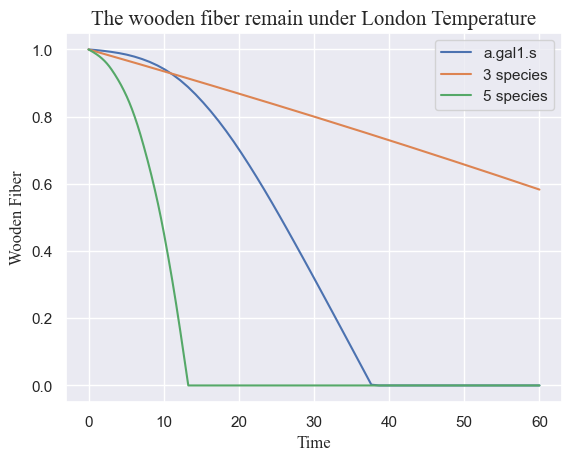

In [223]:
cal_diversity(a1_hyphal_rate, a3_hyphal_rate, hc_hyphal_rate, lc_hyphal_rate, ph_hyphal_rate, init_a1, init_a3, init_hc, init_lc, init_ph, "London Temperature")

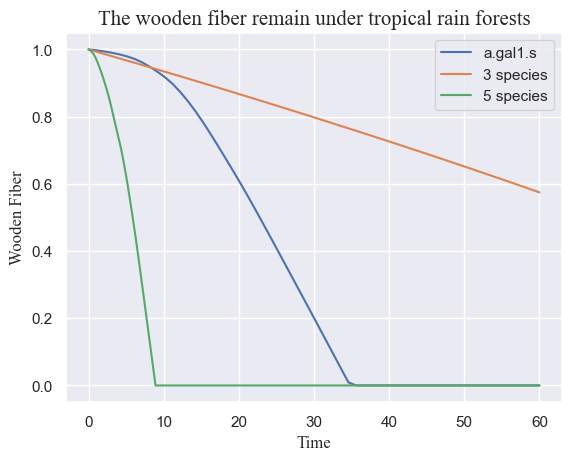

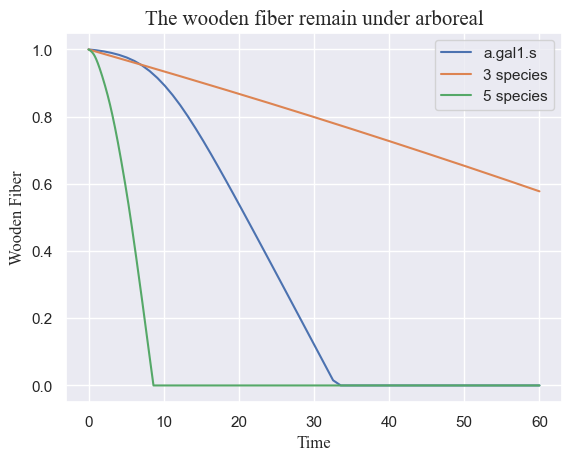

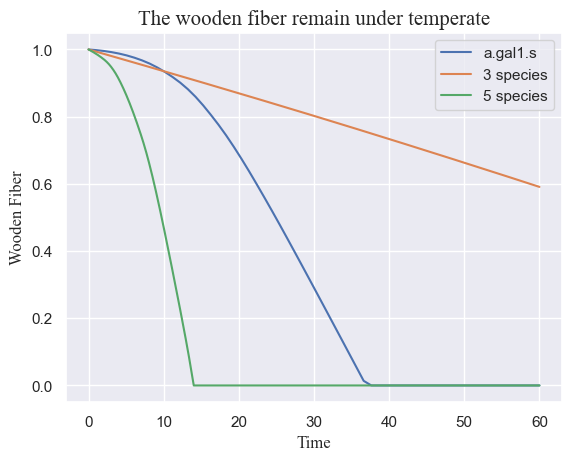

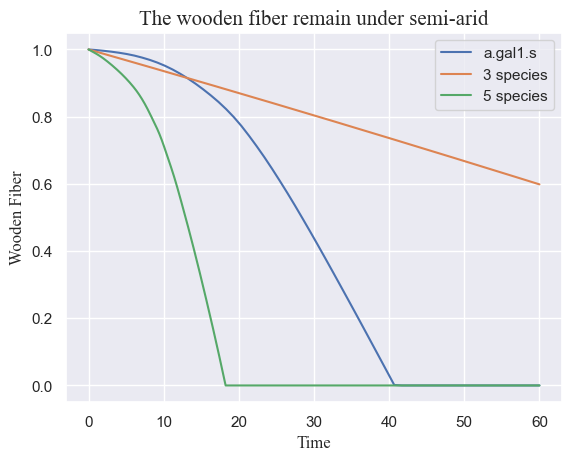

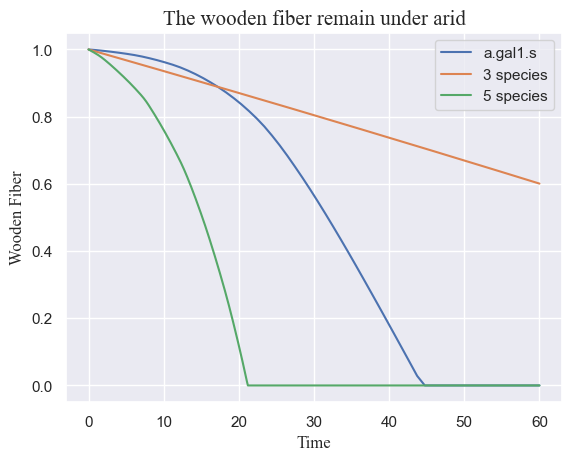

In [224]:
cal_diversity(a1_hyphal_rate_moist, a3_hyphal_rate_moist, hc_hyphal_rate_moist, lc_hyphal_rate_moist, ph_hyphal_rate_moist, init_a1, init_a3, init_hc, init_lc, init_ph, "tropical rain forests")
cal_diversity(a1_hyphal_rate_moist_2, a3_hyphal_rate_moist_2, hc_hyphal_rate_moist_2, lc_hyphal_rate_moist_2, ph_hyphal_rate_moist_2, init_a1, init_a3, init_hc, init_lc, init_ph, "arboreal")
cal_diversity(a1_hyphal_rate_moist_3, a3_hyphal_rate_moist_3, hc_hyphal_rate_moist_3, lc_hyphal_rate_moist_3, ph_hyphal_rate_moist_3, init_a1, init_a3, init_hc, init_lc, init_ph, "temperate",)
cal_diversity(a1_hyphal_rate_moist_4, a3_hyphal_rate_moist_4, hc_hyphal_rate_moist_4, lc_hyphal_rate_moist_4, ph_hyphal_rate_moist_4, init_a1, init_a3, init_hc, init_lc, init_ph, "semi-arid")
cal_diversity(a1_hyphal_rate_moist_5, a3_hyphal_rate_moist_5, hc_hyphal_rate_moist_5, lc_hyphal_rate_moist_5, ph_hyphal_rate_moist_5, init_a1, init_a3, init_hc, init_lc, init_ph, "arid")